## Transforming Numerical Variables

The statistical methods that are used in data analysis make certain assumptions about the data. For example, in the general linear model, it is assumed that the values of the dependent variable (the target) are independent, that there is a linear relationship between the target and the independent (predictor) variables, and that the residuals - that is, the difference between the predictions and the real values of the target - are normally distributed and centered at 0. When these assumptions are not met, the resulting probabilistic statements might not be accurate. To correct for failure in the assumptions and thus improve the performance of the models, we can transform variables before the analysis.

When we transform a variable, we replace its original values with a function of that variable. Transforming variables with mathematical functions helps reduce variable skewness, improves the value spread, and sometimes unmasks linear and additive relationships between predictors and the target. Commonly used mathematical transformations include the logarithm, reciprocal, power, and square and cube root transformations, as well as the Box-Cox and Yeo-Johnson transformations. This set of transformations is commonly referred to as variance stabilizing transformations. 


- Transforming variables with the logarithm function
- Transforming variables with the reciprocal function
- Using the square root to transform variables
- Using power transformations
- Performing Box-Cox transformations
- Performing Yeo-Johnson transformations

### Transforming variables with the logarithm function

The logarithm function is a powerful transformation for dealing with positive data with a right-skewed distribution (observations accumulate at lower values of the variable). A common example is the income variable, with a heavy accumulation of values toward lower salaries. The logarithm transformation has a strong effect on the shape of the variable distribution.

In this recipe, we will perform logarithmic transformation using NumPy, scikit-learn, and Feature-engine. We will also create a diagnostic plot function to evaluate the effect of the transformation on the variable distribution

### Getting ready

To evaluate the variable distribution and understand whether a transformation improves value spread and stabilizes the variance, we can visually inspect the data with histograms and Quantile-Quantile (Q-Q) plots. A Q-Q plot helps us determine whether two variables show a similar distribution. In a Q-Q plot, we plot the quantiles of one variable against the quantiles of the second variable. If we plot the quantiles of the variable of interest against the expected quantiles of the normal distribution, then we can determine whether our variable is also normally distributed. If the variable is normally distributed, the points in the Q-Q plot will fall along a 45-degree diagonal

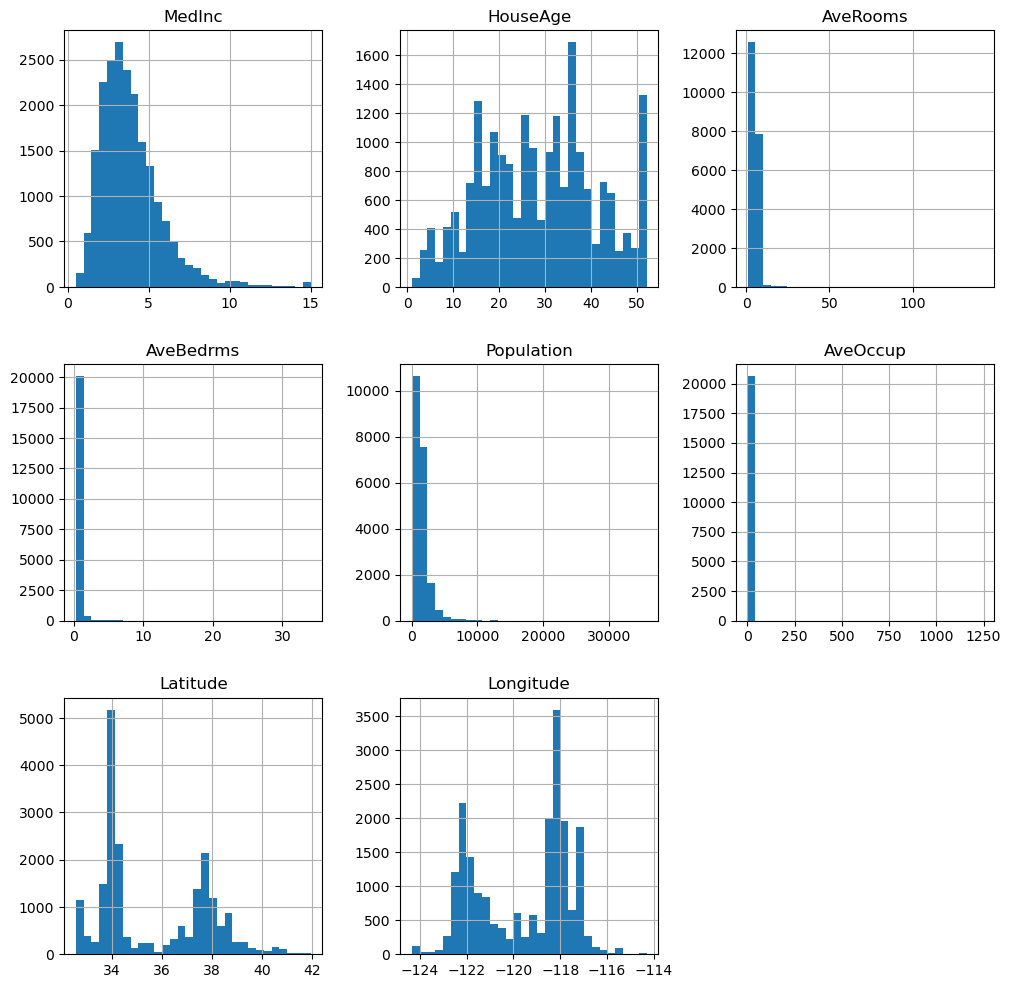

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.hist(bins=30, figsize=(12, 12))
plt.show()

In the following output, we can see that the MedInc variable shows a mild right-skewed distribution, variables such as AveRooms and Population are heavily right-skewed, and the HouseAge variable shows an even spread of values across its range:

To evaluate the effect of the transformation on the variable distribution, we'll create a function that takes a DataFrame and a variable name as inputs and plots a histogram next to a Q-Q plot:

In [351]:
def diagnostic_plot(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f'Histogram of {variable}')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()


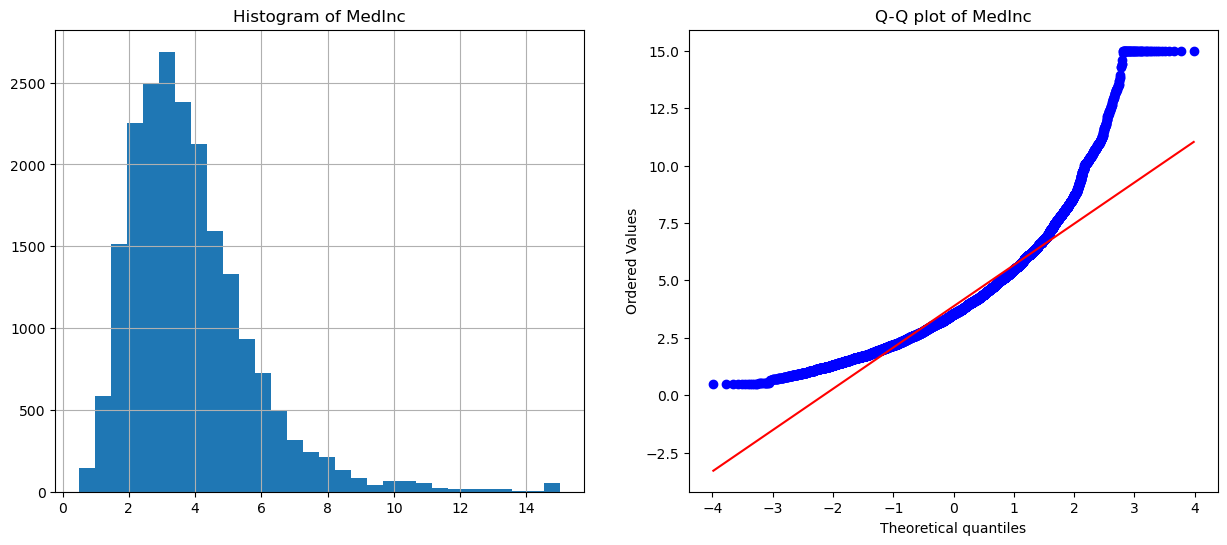

In [352]:
# Let's plot the distribution of the MedInc variable with the function
diagnostic_plot(X, 'MedInc')

Now, let's transform the data with logarithm:

In [353]:
X_tf = X.copy()

**NOTE**: If we execute X_tf = X instead of using pandas' copy()function, X_tf will not be a copy of the DataFrame; instead, it will be another view of the same data. Therefore, changes made in X_tf will be reflected in X as well.

In [354]:
# Let's make a list with the variables that we want to transform:
vars = ["MedInc","AveRooms","AveBedrms","Population"]

Let's apply the logarithmic transformation with NumPy to the variables from step 7 and capture the transformed variables in the new DataFrame:

In [355]:
X_tf[vars] = np.log(X[vars])

**IMPORTANT**: Remember that the logarithm transformation can only be applied to strictly positive variables. If the variables have zero or negative values, sometimes, it is useful to add a constant to make those values positive. We could add a constant value of 1 using X_tf[vars] = np.log(X[vars] + 1)

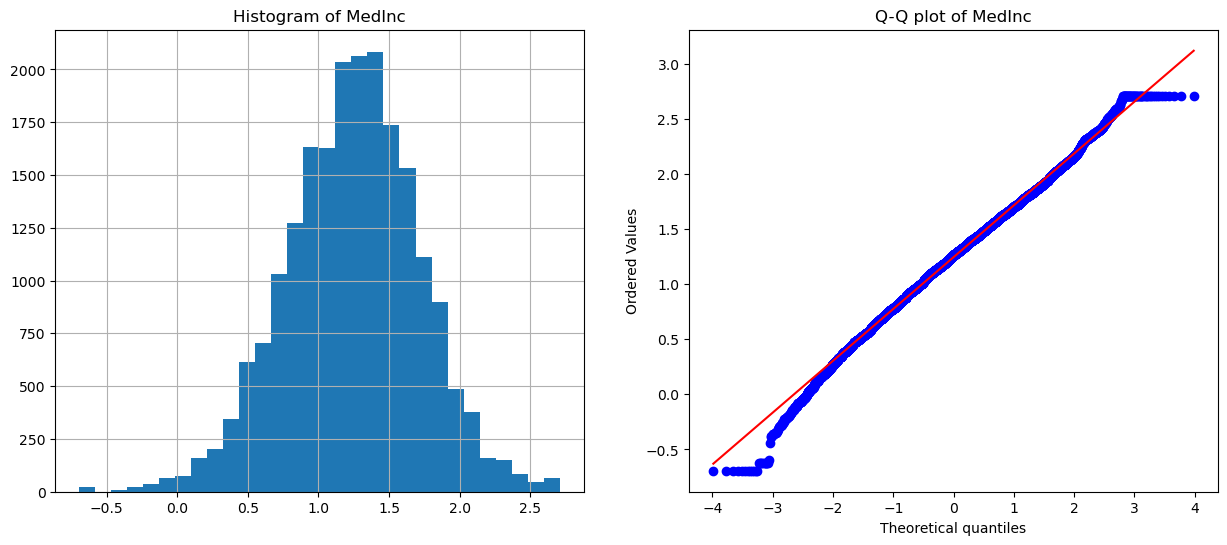

In [356]:
# Let's check the distribution of MedInc after the transformation with the diagnostic function
diagnostic_plot(X_tf, 'MedInc')

In the following output, we can see that the logarithmic transformation returned a more evenly distributed variable that better approximates the theoretical normal distribution in the Q-Q plot

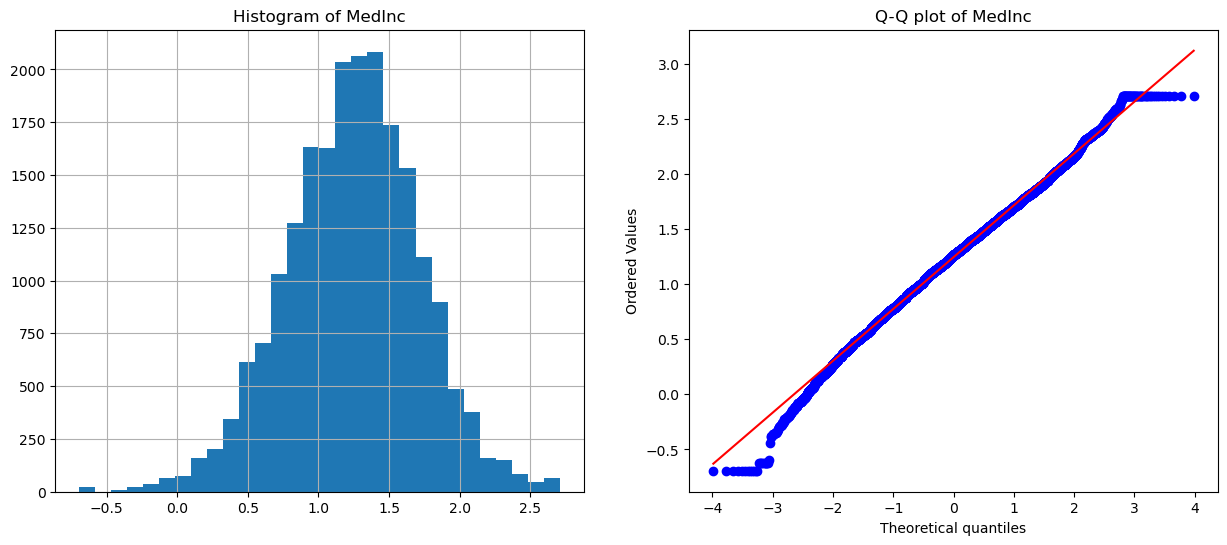

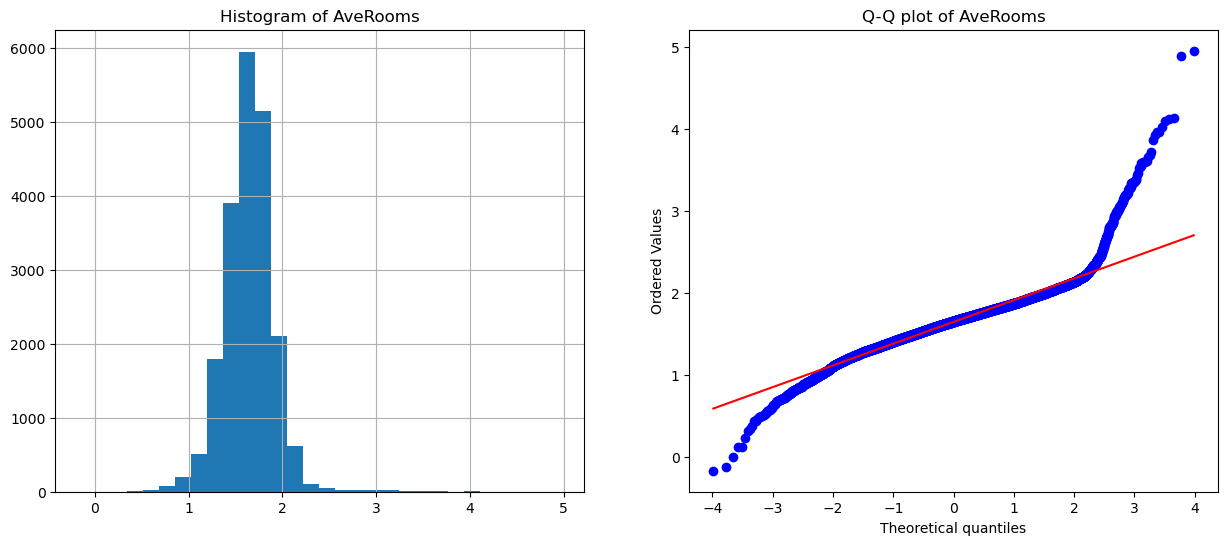

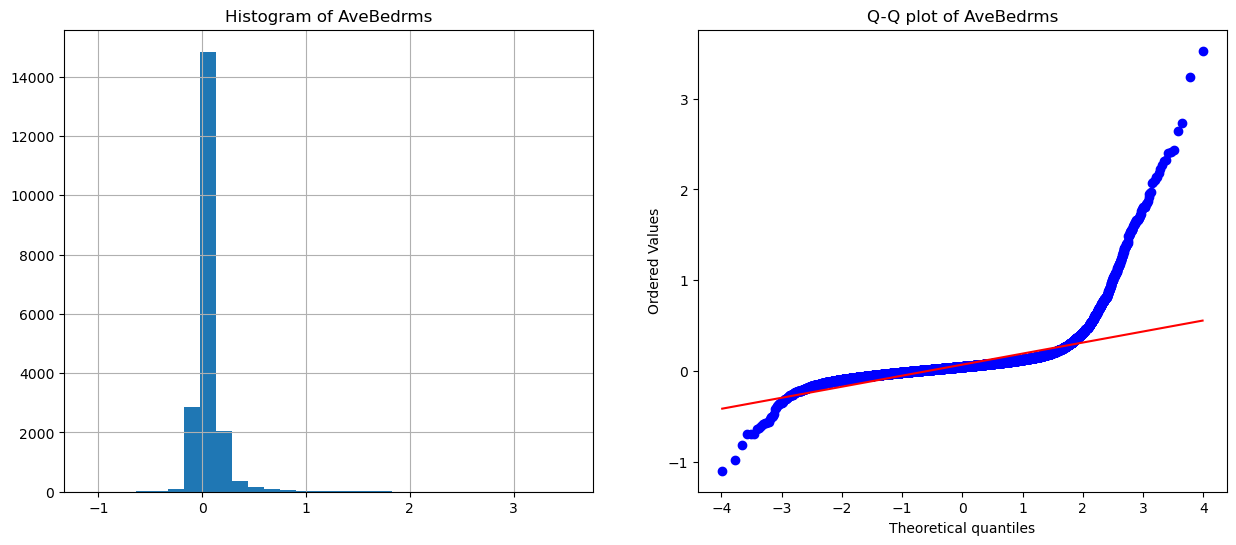

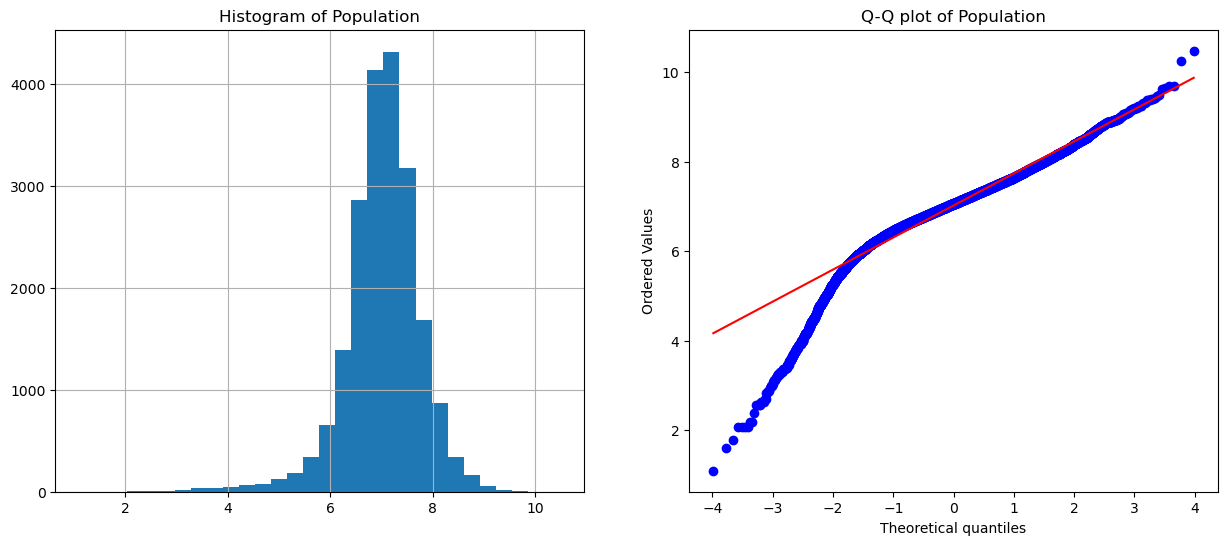

In [357]:
for var in vars:
    diagnostic_plot(X_tf, var)

### Now, let's apply the logarithmic transformation with scikit-learn

In [358]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log, inverse_func=np.exp)


**NOTE**: f we set up FunctionTransformer() with the default parameter, validate=False, we don't need to fit the transformer before transforming the data. If we set validate to True, the transformer will check the data input to the fit method. The latter is useful when fitting the transformer with a DataFrame so that it learns and stores the variable names

In [359]:
# Let's transform the positive variables

X_tf[vars] = transformer.transform(X[vars])

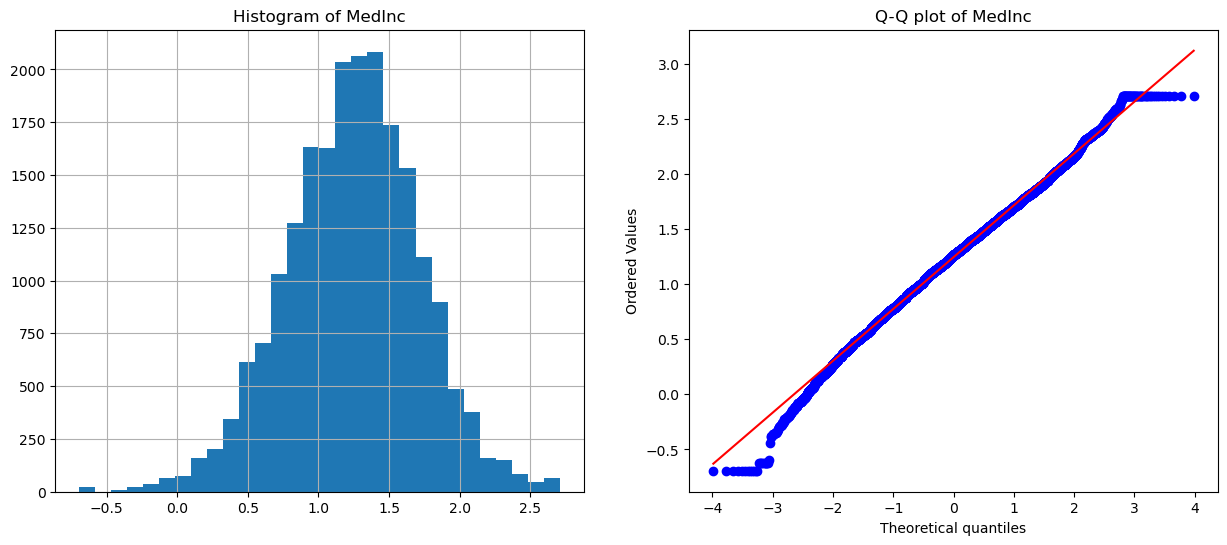

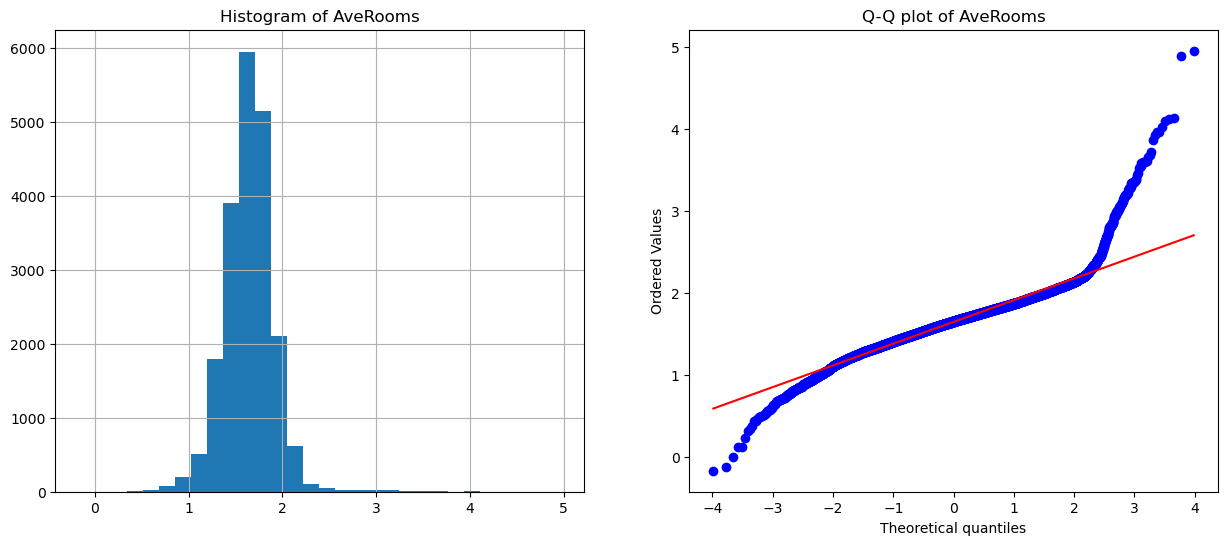

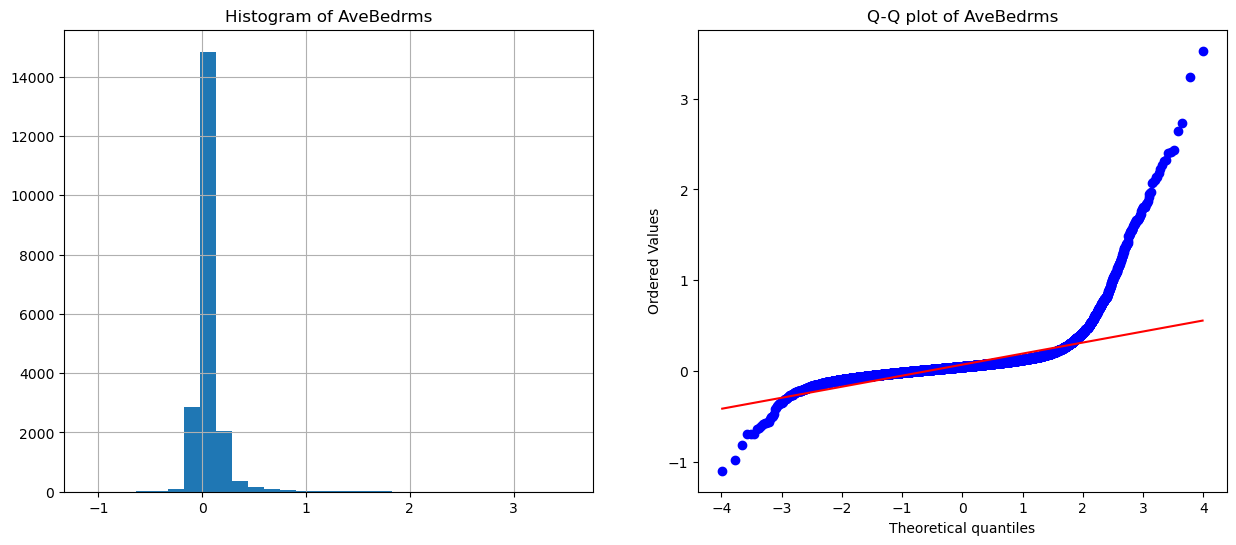

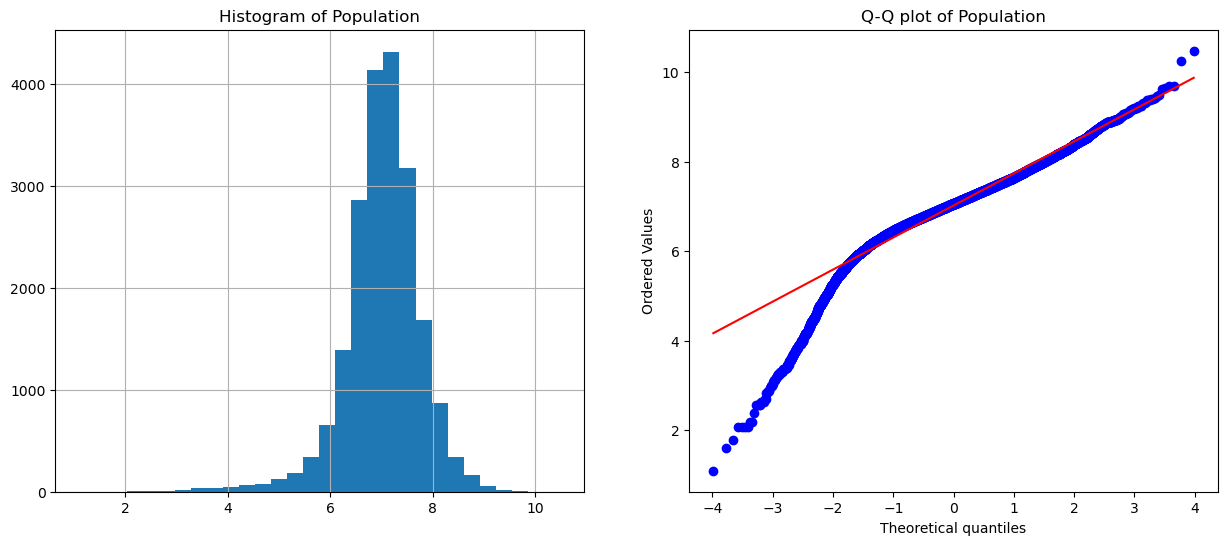

In [360]:
for var in vars:
    diagnostic_plot(X_tf, var)

In [361]:
X_tf[vars] = transformer.inverse_transform(X_tf[vars])

Let's now revert the transformation to the original variable representation

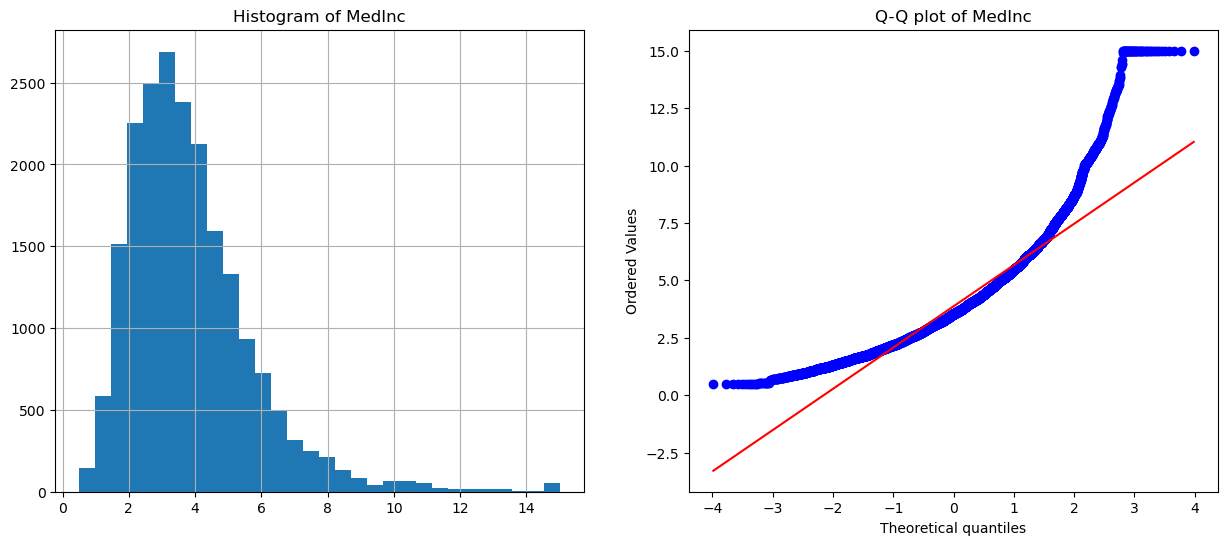

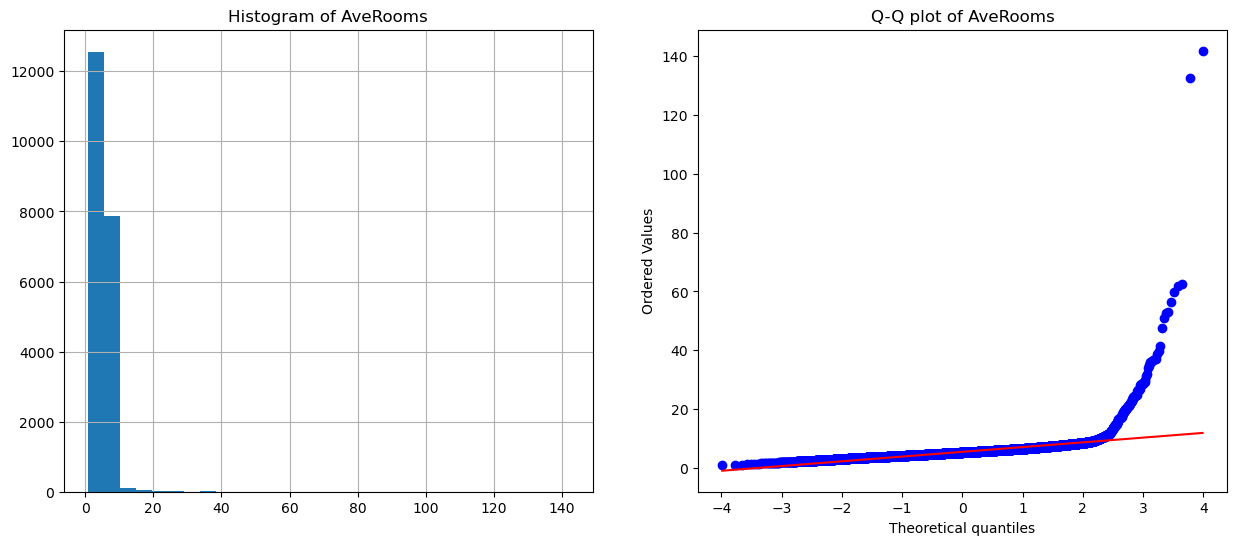

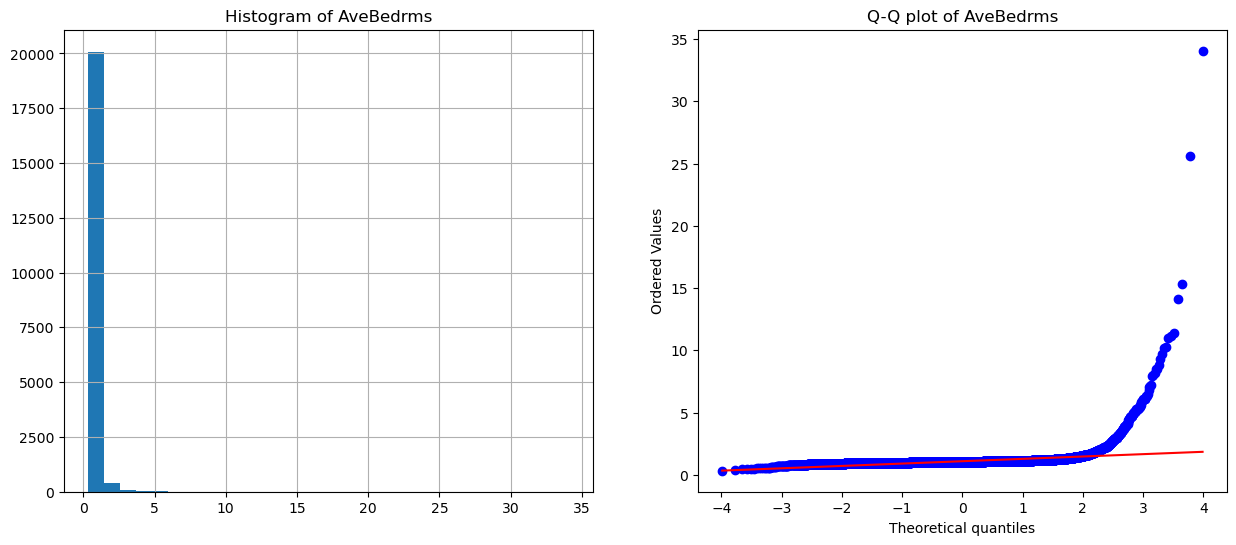

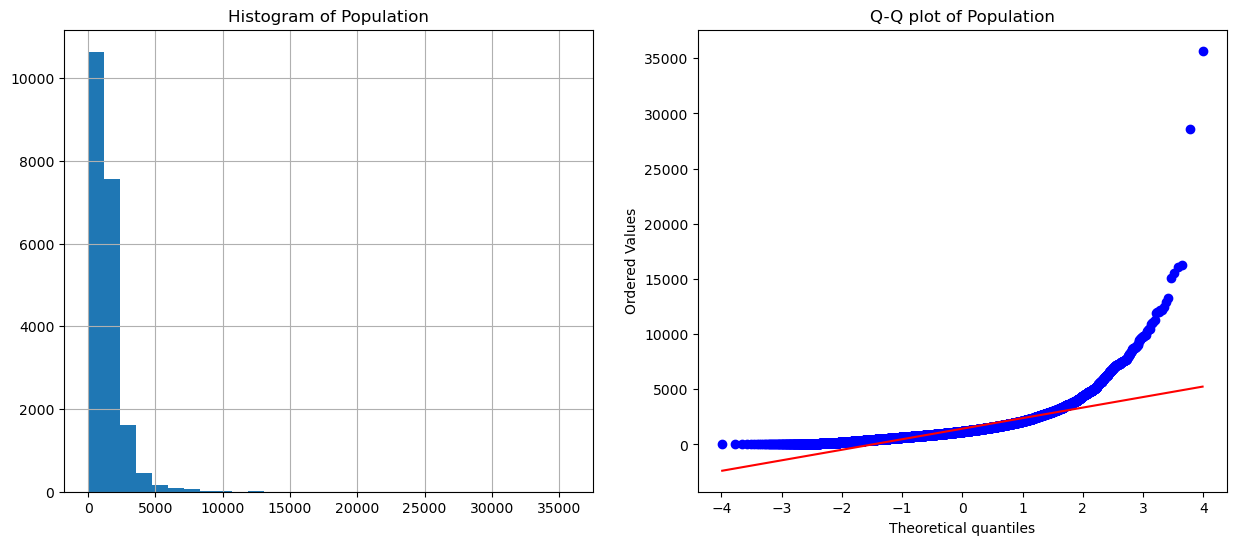

In [362]:
for var in vars:
    diagnostic_plot(X_tf, var)

To add a constant value to the variables, in case they are not strictly positive, use

```
transformer = FunctionTransformer(lambda x: np.log(x + 1))

```

### Now, let's apply the logarithm transformation with Feature-engine

In [363]:
from feature_engine.transformation import LogTransformer

lt = LogTransformer(variables=vars)
lt.fit(X)

LogTransformer(variables=['MedInc', 'AveRooms', 'AveBedrms', 'Population'])

**NOTE**: If the variables argument is left as None, LogTransformer() applies the logarithm to all the numerical variables found during fit(). Alternatively, we can indicate which variables to modify,

In [364]:
X_tf = lt.transform(X)

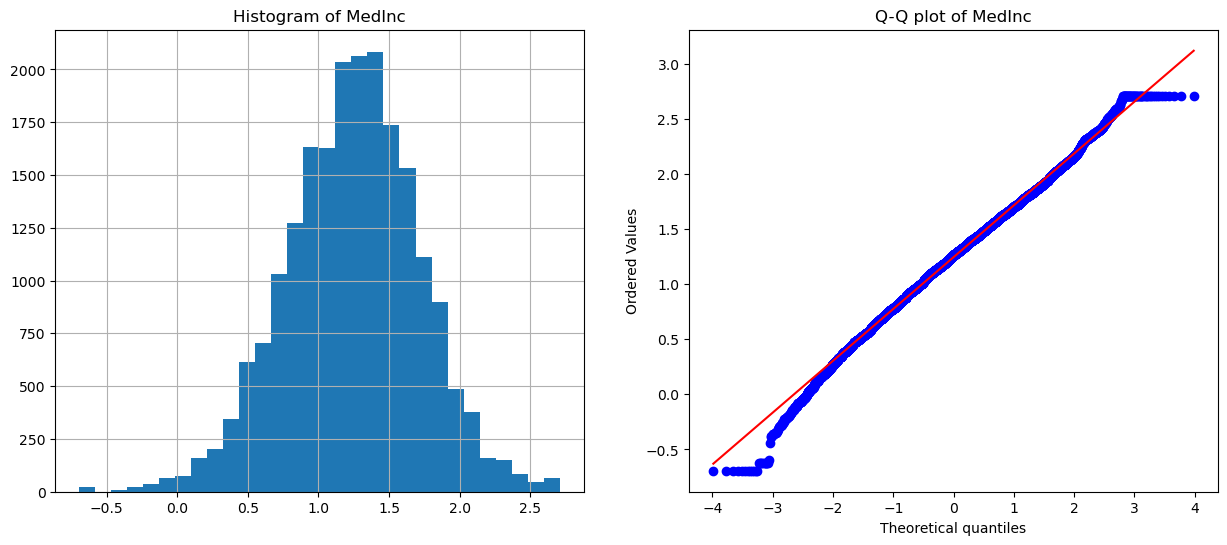

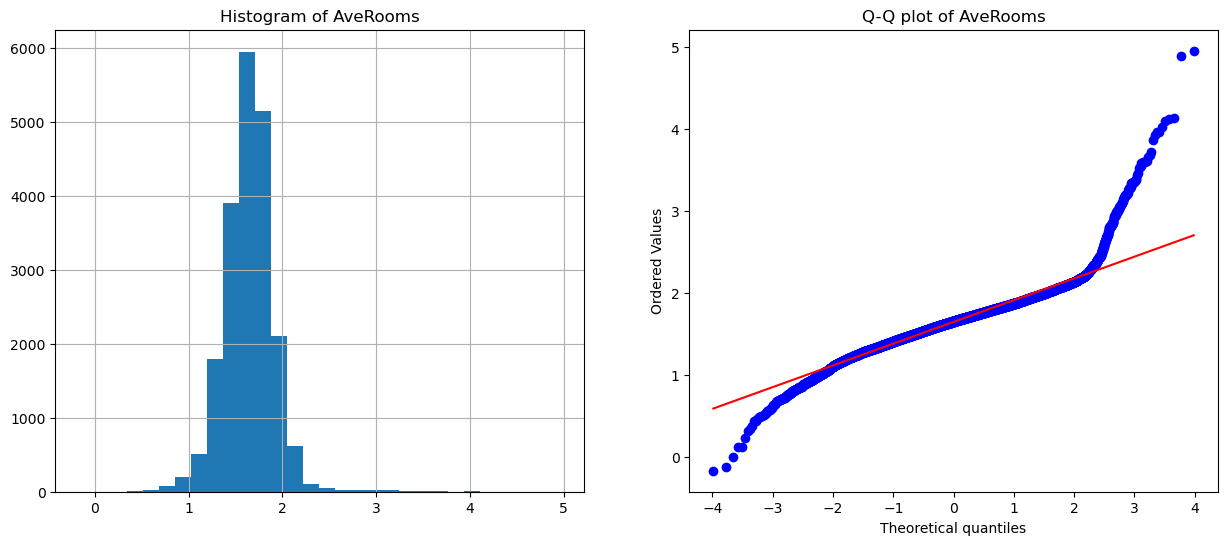

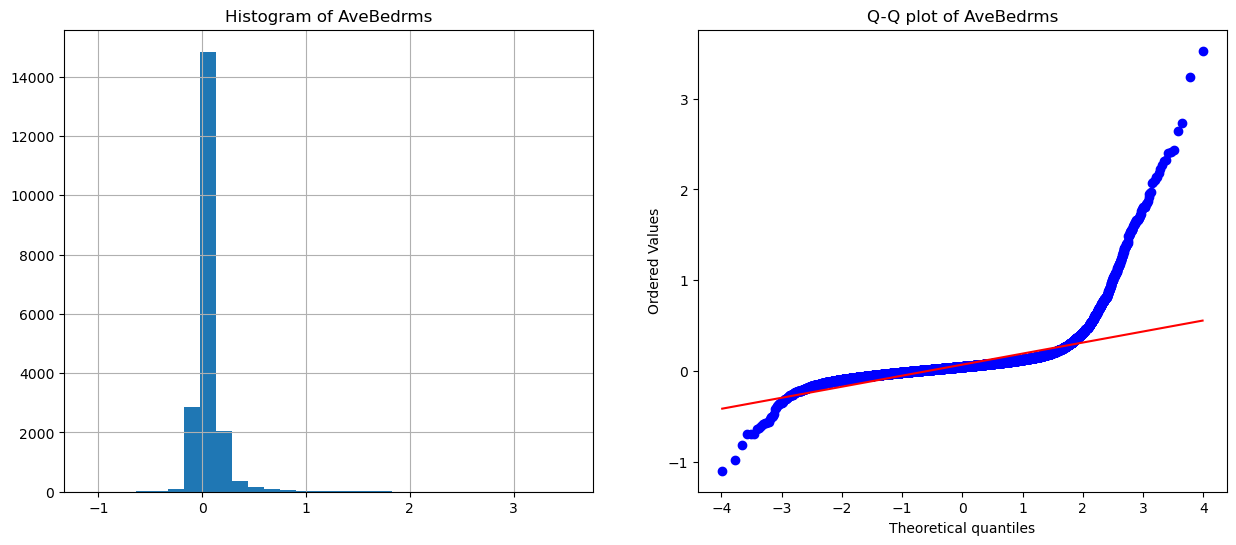

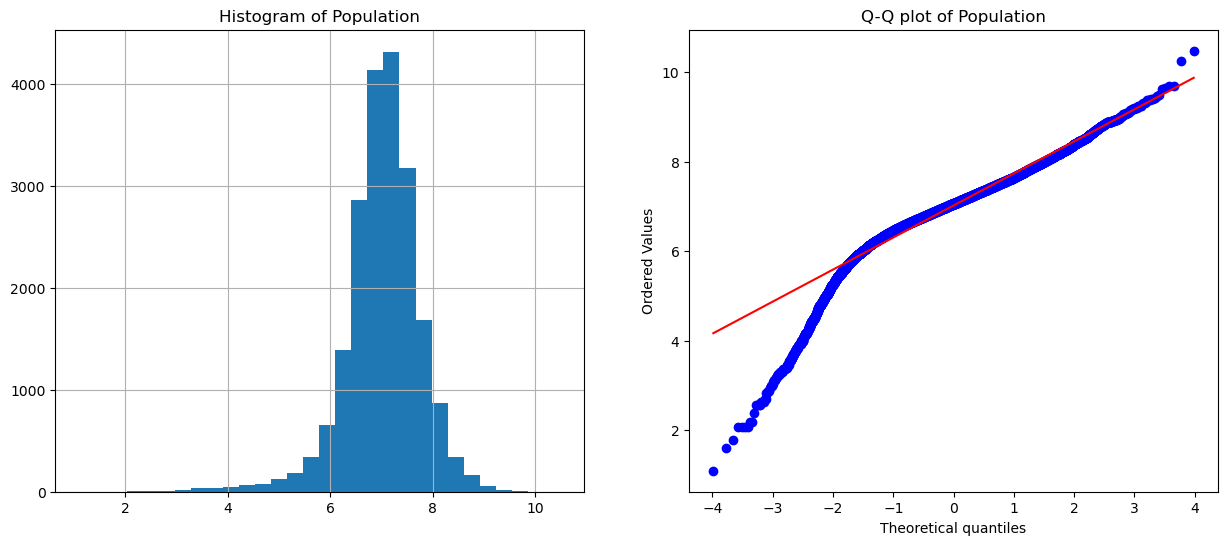

In [365]:
for var in vars:
    diagnostic_plot(X_tf, var)

We can also revert the transformed variables to their original representation

In [366]:
X_tf = lt.inverse_transform(X_tf)

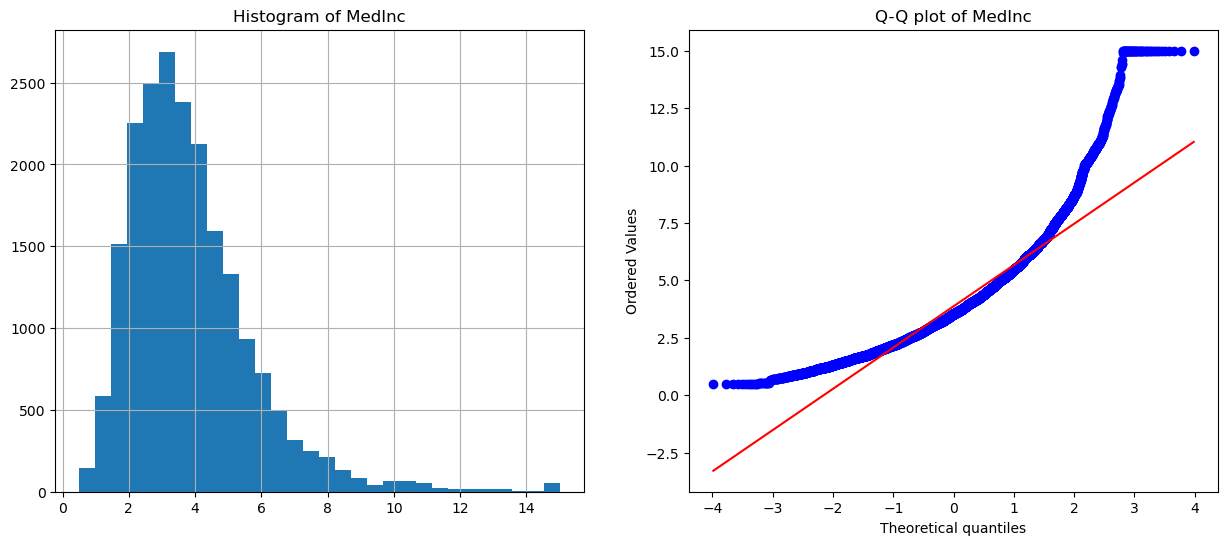

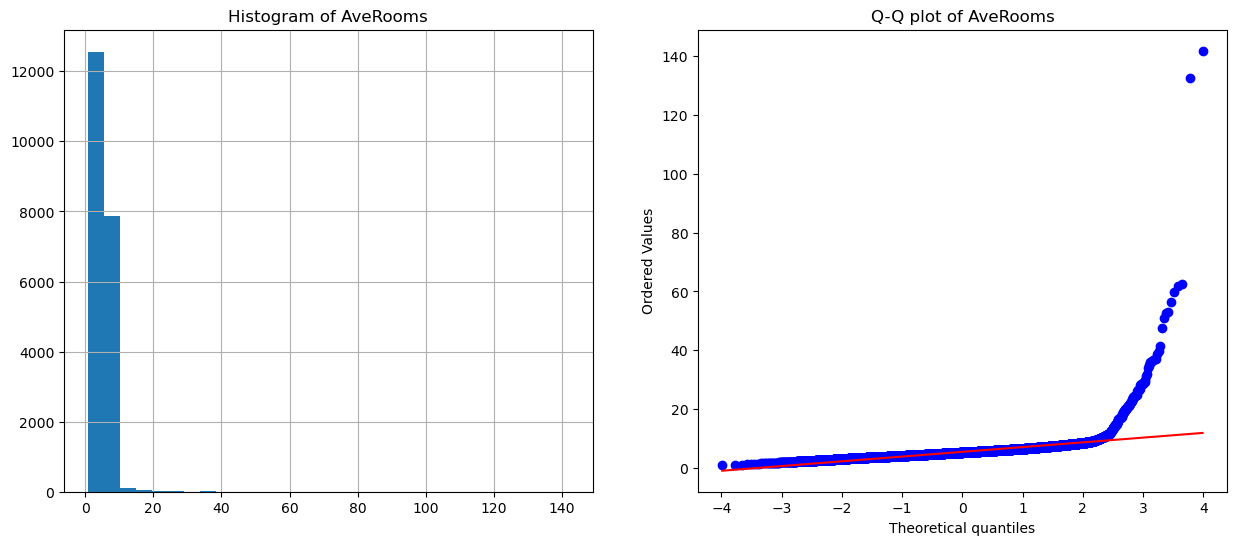

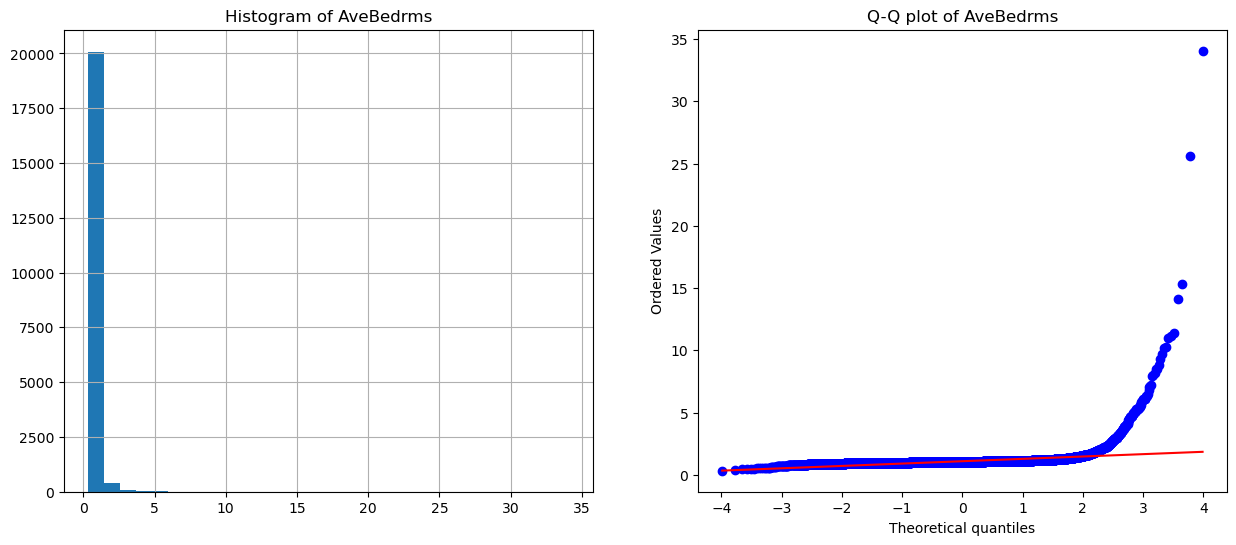

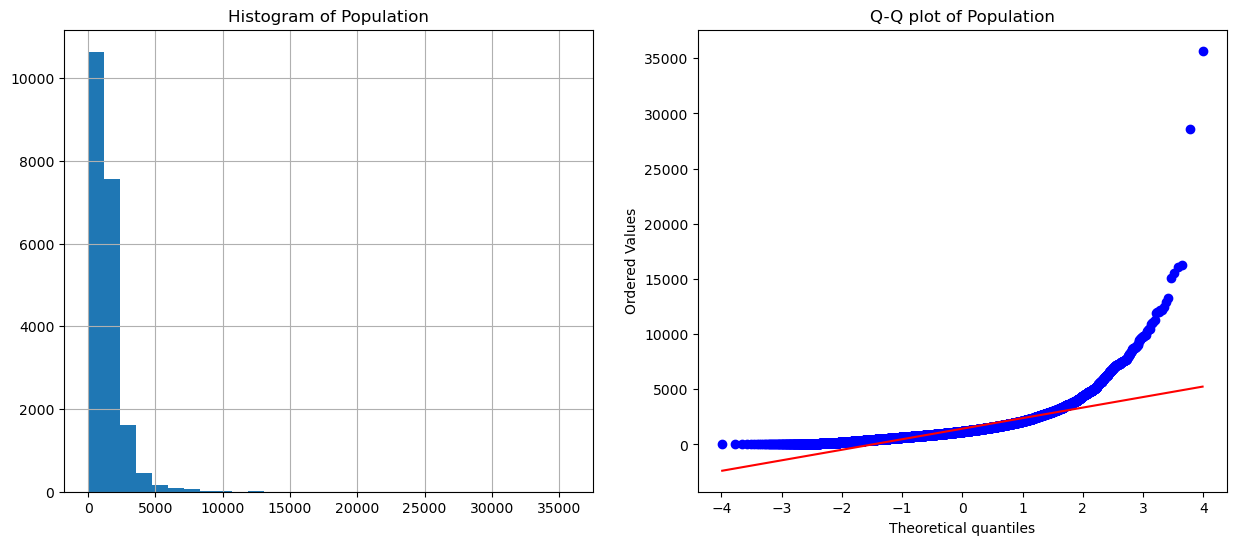

In [367]:
for var in vars:
    diagnostic_plot(X_tf, var)

### Transforming variables with the reciprocal function

The reciprocal function is defined as 1/x. It is often useful when we have ratios - that is, values resulting from the division of two variables. Examples of this are population density - that is, people per area - and, as we will see in this recipe, house occupancy - that is, the number of occupants per house.

The reciprocal transformation is not defined for the 0 value, and although it is defined for negative values, it is mainly useful for transforming positive variables.

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


To evaluate variable distributions, we'll create a function that takes a DataFrame and a variable name as inputs and plots a histogram next to a Q-Q plot:

In [369]:
def diagnostic_plot(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f'Histogram of {variable}')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()


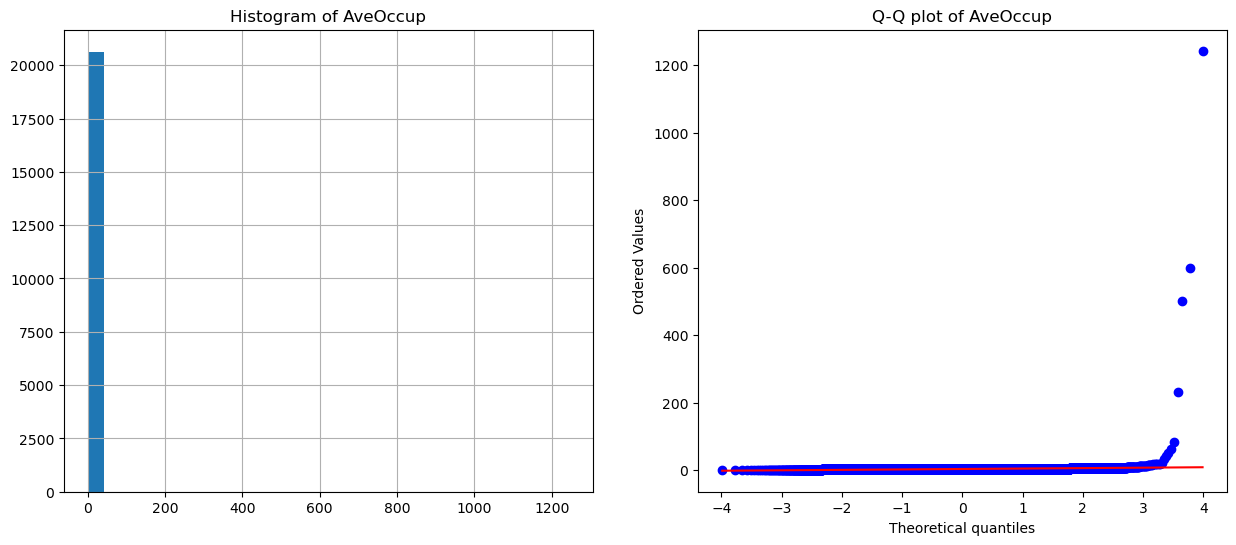

In [370]:
diagnostic_plot(X, "AveOccup")

The AveOccup variable shows a very strong right-skewed distribution, as shown in the following

**NOTE**: The AveOccup variable refers to the average number of household members - that is, the ratio between the number of people and the number of houses in a certain area. This is a promising variable for a reciprocal transformation.

### Now, let's apply the reciprocal transformation with NumPy.

In [371]:
X_tf = X.copy()

In [372]:
X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])

Let's check the distribution of the AveOccup variable after the transformation with the diagnostic

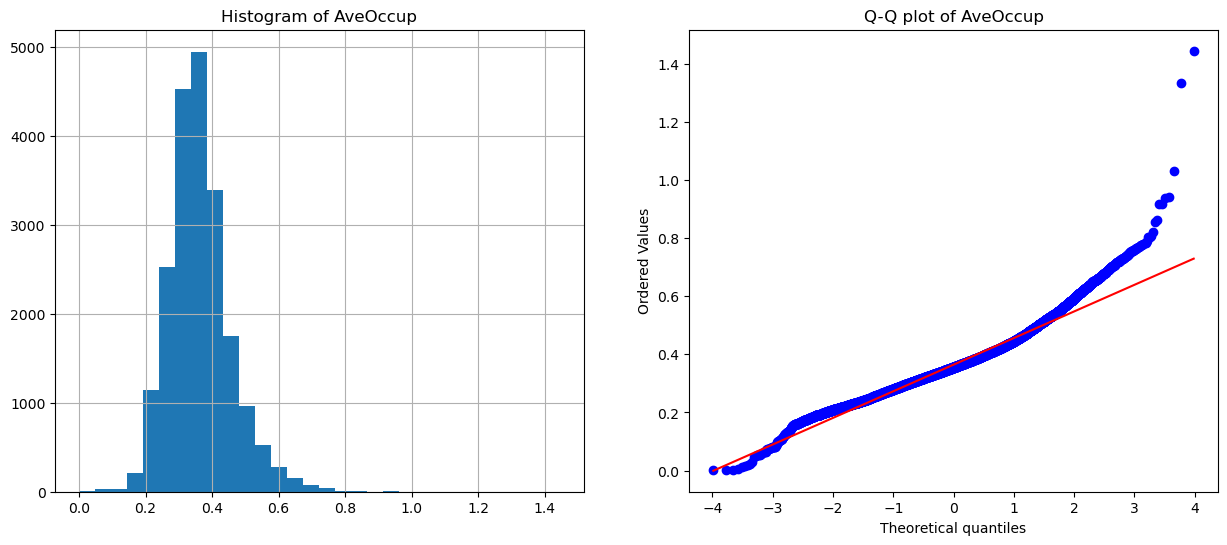

In [373]:
diagnostic_plot(X_tf, "AveOccup")

### Now, let's apply the reciprocal transformation with scikit-learn

In [374]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.reciprocal)

**NOTE**: By default, FunctionTransformer() does not need to be fit before transforming the data

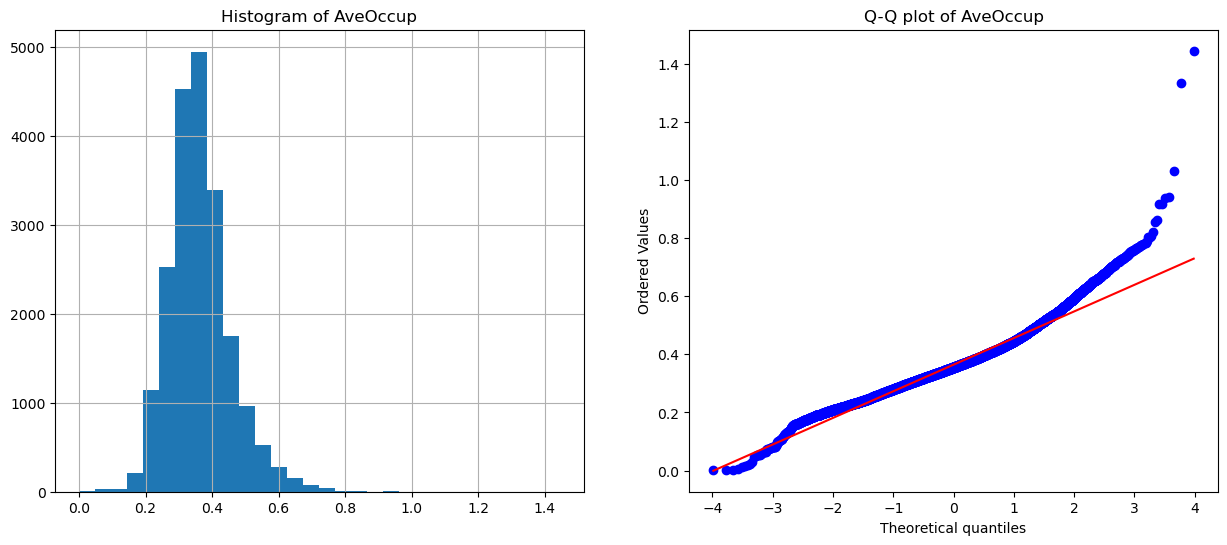

In [375]:
X_tf = X.copy()
X_tf['AveOccup'] = transformer.transform(X_tf['AveOccup'])

diagnostic_plot(X_tf, 'AveOccup')

### Now, let's apply the reciprocal transformation with feature-engine

In [376]:
from feature_engine.transformation import ReciprocalTransformer

X_tf = X.copy()

rt = ReciprocalTransformer(variables="AveOccup")
rt.fit(X)

X_tf = rt.transform(X)

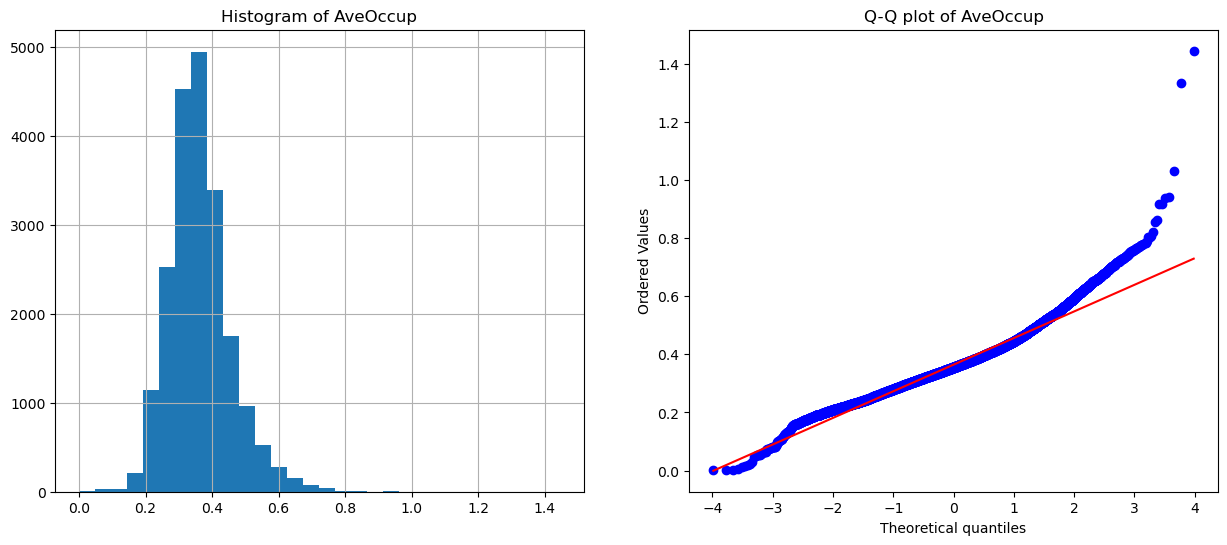

In [377]:
diagnostic_plot(X_tf, "AveOccup")

### Using the square root to transform variables

The square root transformation, √x, as well as its variations, the Anscombe transformation, √(x+3/8), and the Freeman-Tukey transformation,  √x + √(x+1), are variance stabilizing transformations that transform a variable with a Poisson distribution into one with an approximately standard Gaussian distribution




square root transformation is a form of power transformation where the exponent is 1/2 and is only defined for positive values.

In [378]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Let's create a DataFrame with two variables drawn from a Poisson distribution with mean value
# of 2 and 3, respectively, and 10000 observations

df = pd.DataFrame()
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

df

,counts1,counts2
0,3,2
1,1,3
2,2,0
3,6,1
4,5,4
...,...,...
9995,7,1
9996,1,1
9997,2,1
9998,1,1


Let's create a function that takes a DataFrame and a variable name as inputs and plots a bar graph with the number of observations per value next to a Q-Q plot:

In [379]:
def diagnostic_plot(df: pd.DataFrame, variable: str):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index().plot.bar()
    plt.title(f'Histogram of {variable}')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of {variable}')
    plt.show()

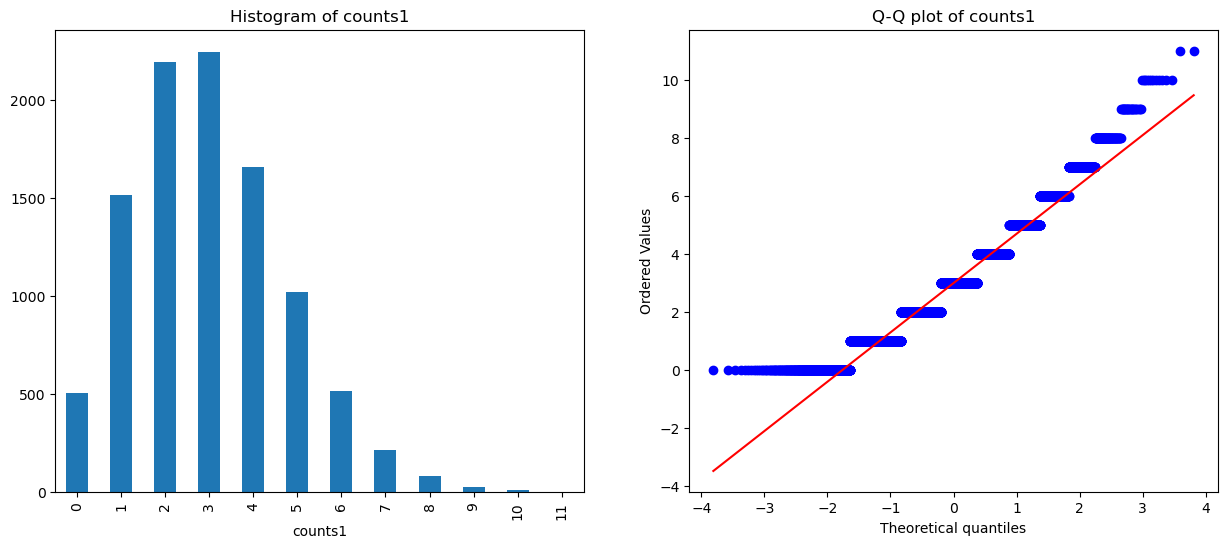

In [380]:
diagnostic_plot(df, "counts1")

Here, we can see the Poisson distribution in the output:

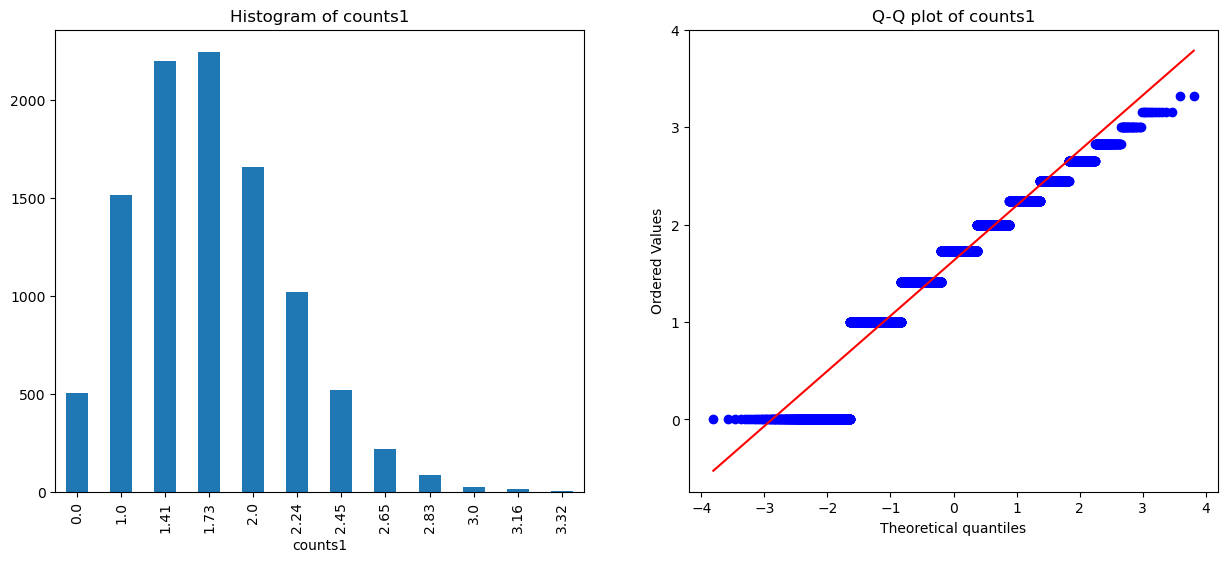

In [381]:
# Now let's make a copy of the dataset
df_tf = df.copy()

# Let's apply the square root transformation to both variables
df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1","counts2"]])

# Let's round the values to two decimals for a nicer visualization
df_tf[['counts1','counts2']] = np.round(df_tf[['counts1','counts2']], 2)

# Let's plot the distribution of counts1 after the transformation
diagnostic_plot(df_tf, 'counts1')

We see a more stabilized variance, as the dots in the Q-Q plot follow the 45-degree diagonal more closely:

### Now, let’s apply the square root transformation with scikit-learn

In [382]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.sqrt).set_output(transform='pandas')

**NOTE**:  If we wanted to round the values as we did in step 7, we can set up the transformer using 

```
transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))
```

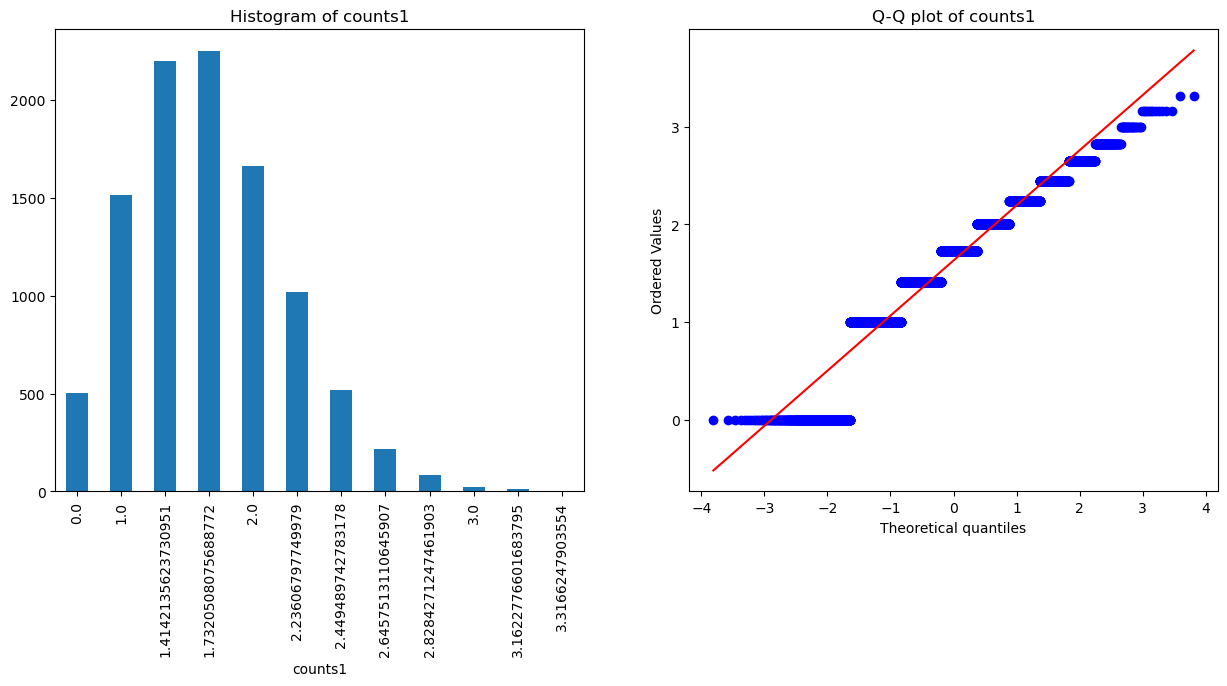

In [383]:
df_tf = df.copy()
df_tf = transformer.transform(df)

diagnostic_plot(df_tf, 'counts1')

### Apply the square root with Feature-engine

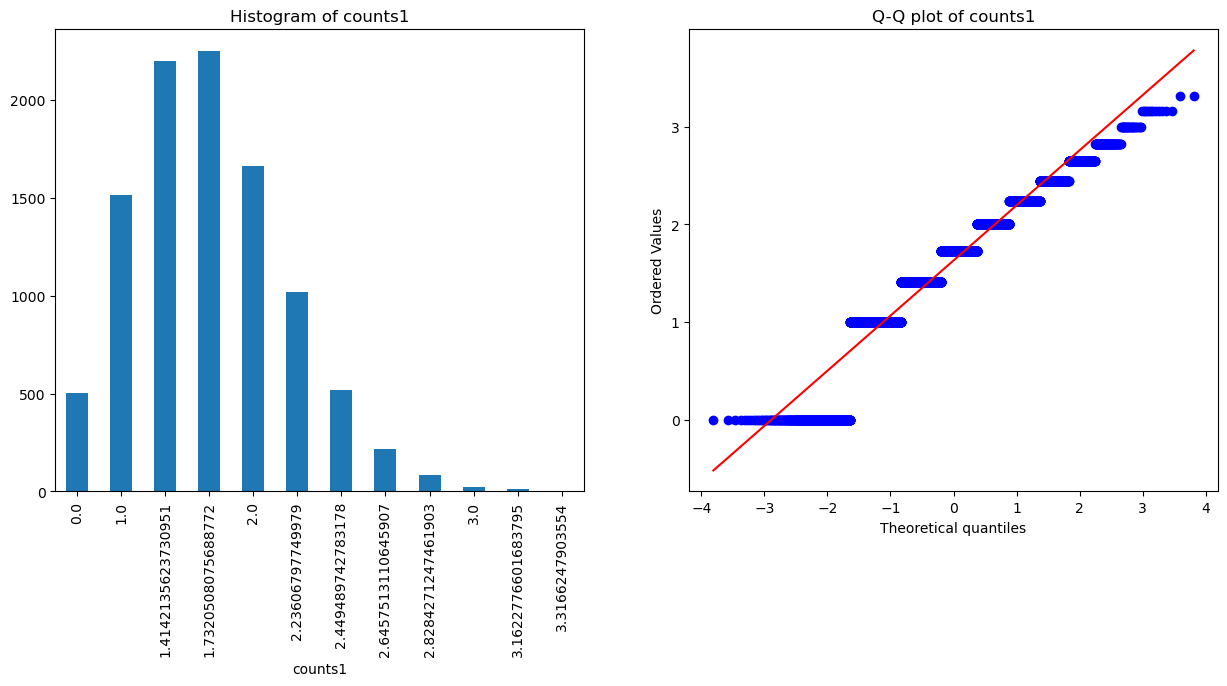

In [384]:
from feature_engine.transformation import PowerTransformer

root_t = PowerTransformer(exp=1/2)

root_t.fit(df)
df_tf = root_t.transform(df)


diagnostic_plot(df_tf, 'counts1')

### Using power transformations

Power functions are mathematical transformations that follow the  format, where lambda can take any value. The square and cube root transformations are special cases of power transformations where lambda is 1/2 or 1/3, respectively. The challenge resides in finding the value for the lambda parameter. The Box-Cox transformation, which is a generalization of the power transformations, finds the optimal lambda  value via maximum likelihood. We will discuss the Box-Cox transformation in the following recipe. In practice, we will try different lambda values and visually inspect the variable distribution to determine which one offers the best transformation

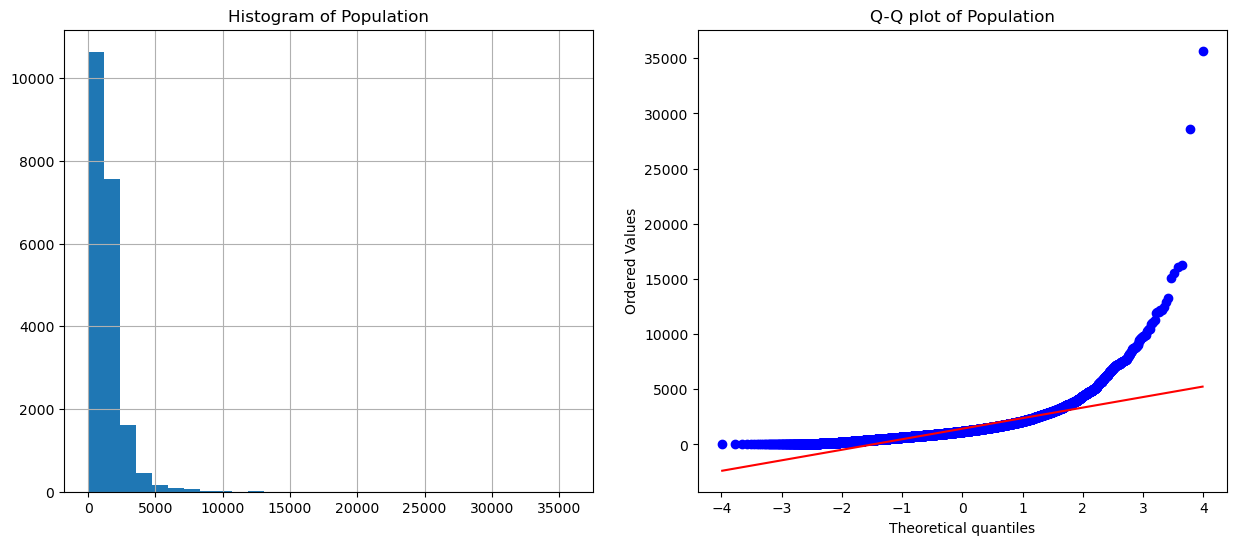

In [385]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

def diagnostic_plot(df: pd.DataFrame, variable: str):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f'Histogram of {variable}')
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of {variable}')
    plt.show()
diagnostic_plot(X, 'Population')

In the plots returned by the previous command, we can see that Population is heavily skewed to the right:

Now, let's apply a power transformation to the MedInc and Population variables. As both are skewed to the right, an exponent smaller than 1 might return a better spread of the variable values.

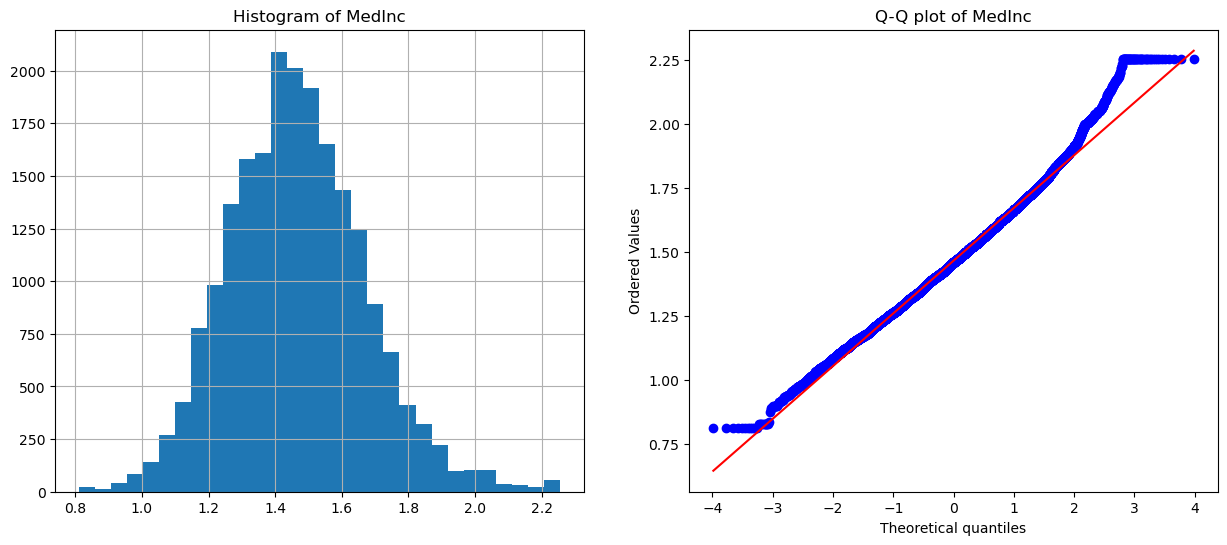

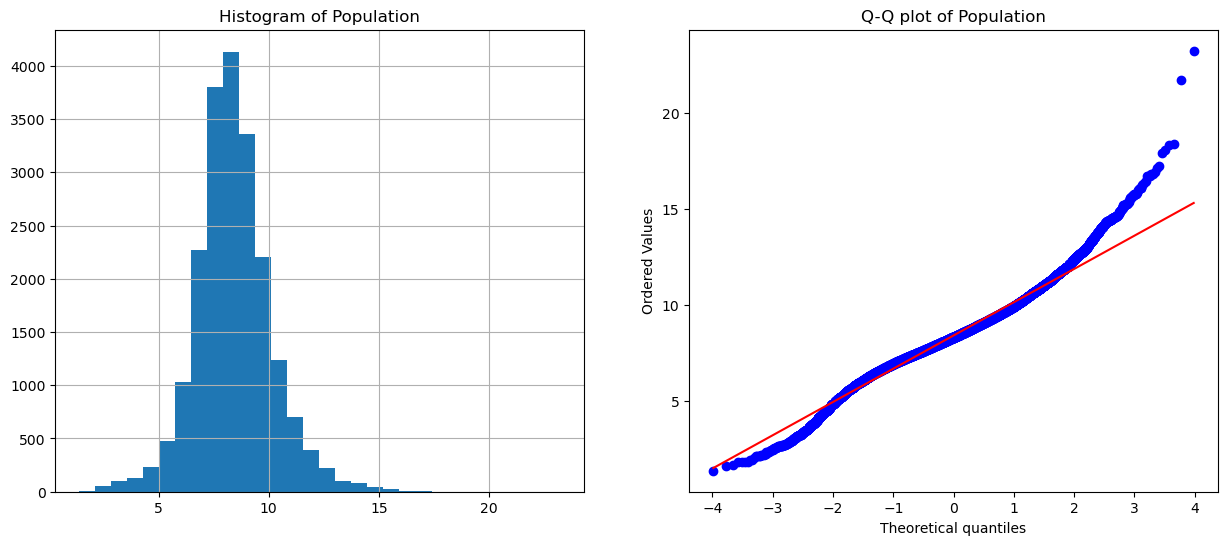

In [386]:
variables = ["MedInc", "Population"]

X_tf = X.copy()
X_tf[variables] = np.power(X[variables], 0.3)

for var in variables:
    diagnostic_plot(X_tf, var)

As shown in the plots returned by the previous command, Population and MedInc are now more evenly distributed across the value range and follows the quantiles of the normal distribution more closely

### Using sklearn

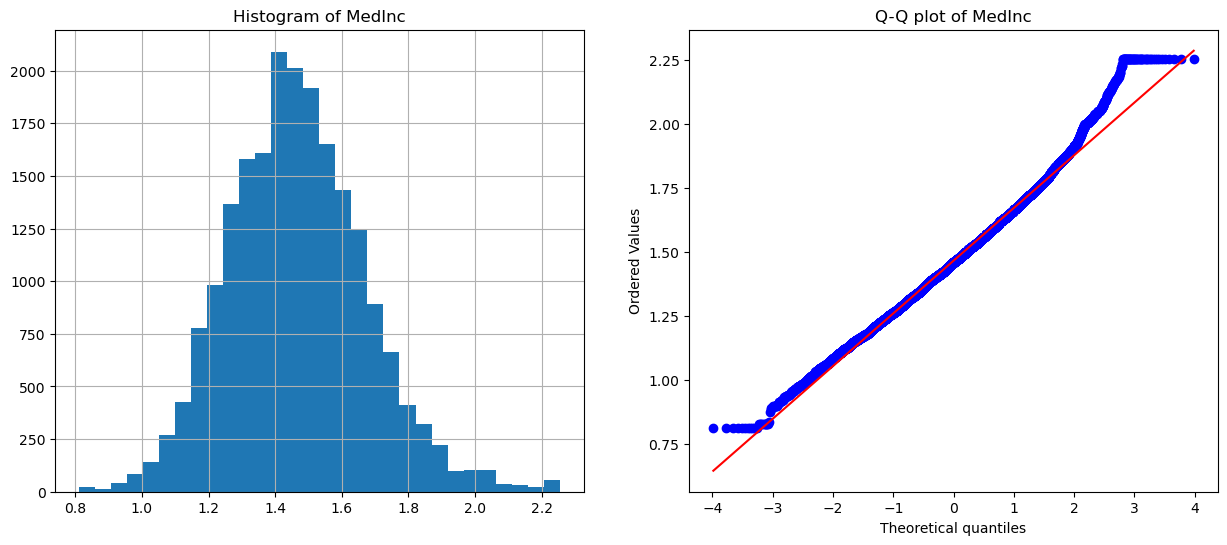

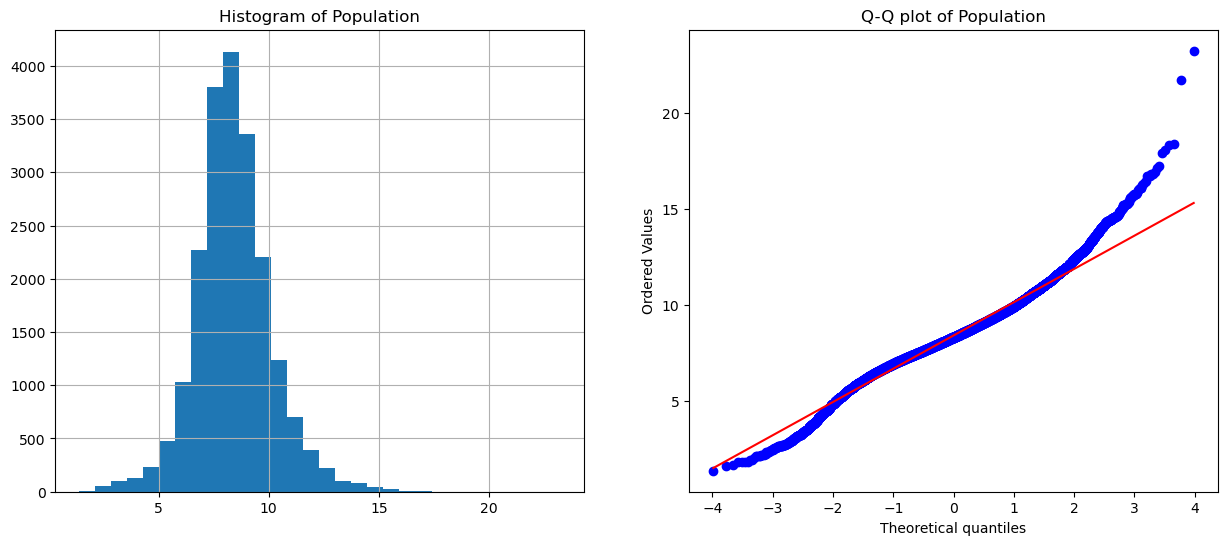

In [387]:
transformer = FunctionTransformer(lambda x: np.power(x, 0.3))

X_tf = X.copy()
X_tf[variables] = transformer.transform(X[variables])

for var in variables:
    diagnostic_plot(X_tf, var)

### Using Feature Engine

In [388]:
power_t = PowerTransformer(variables=variables, exp=0.3)
power_t.fit(X)

PowerTransformer(exp=0.3, variables=['MedInc', 'Population'])

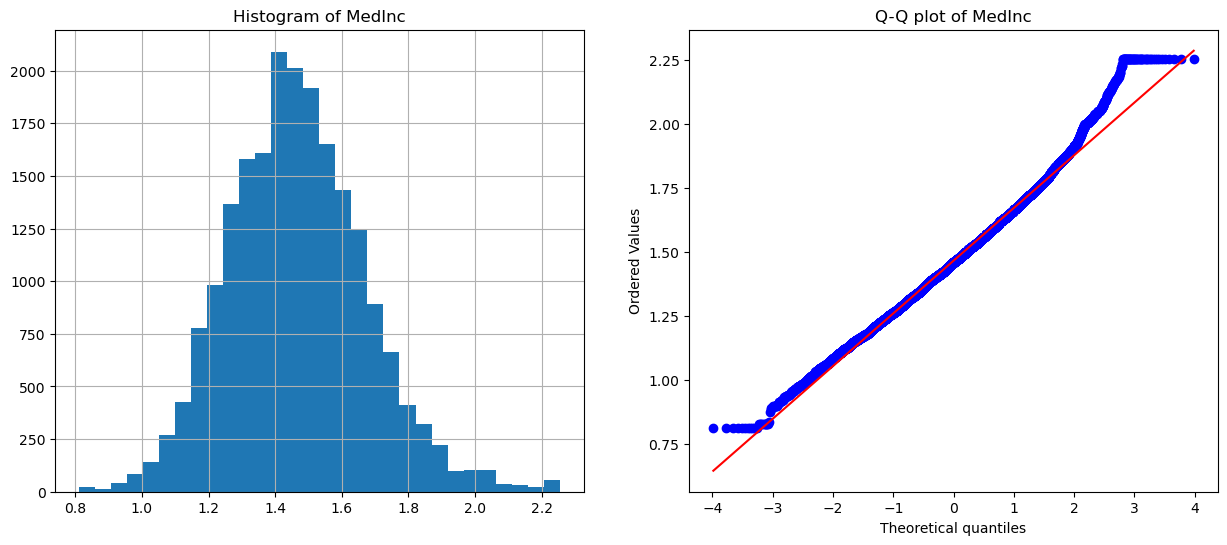

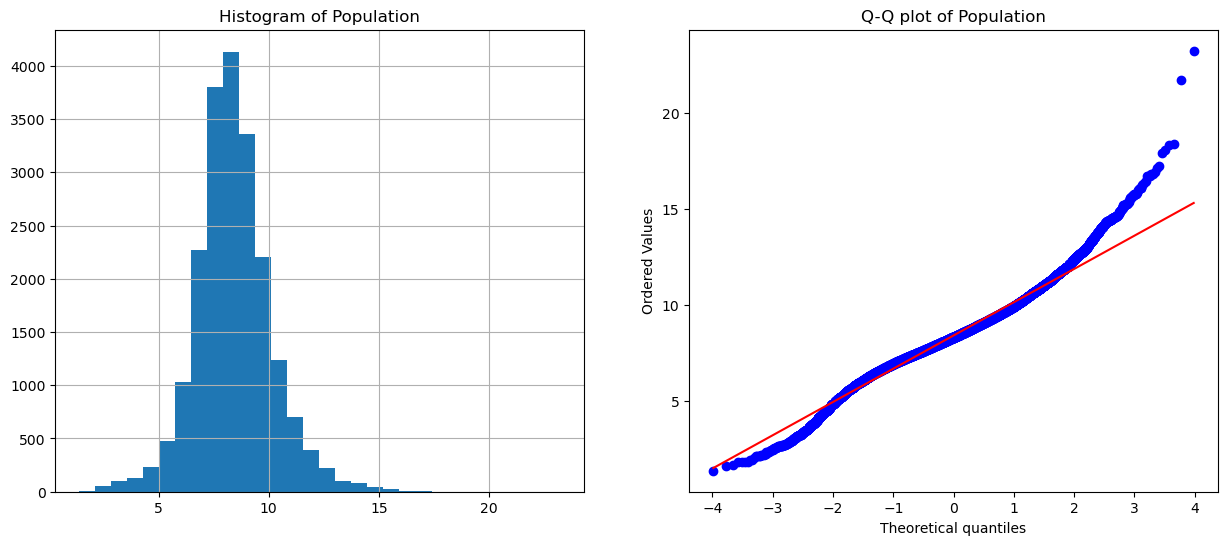

In [389]:
X_tf = power_t.transform(X)

for var in variables:
    diagnostic_plot(X_tf, var)

### Performing Box-Cox transformations




![Box Cox](../img/box_cox.png)

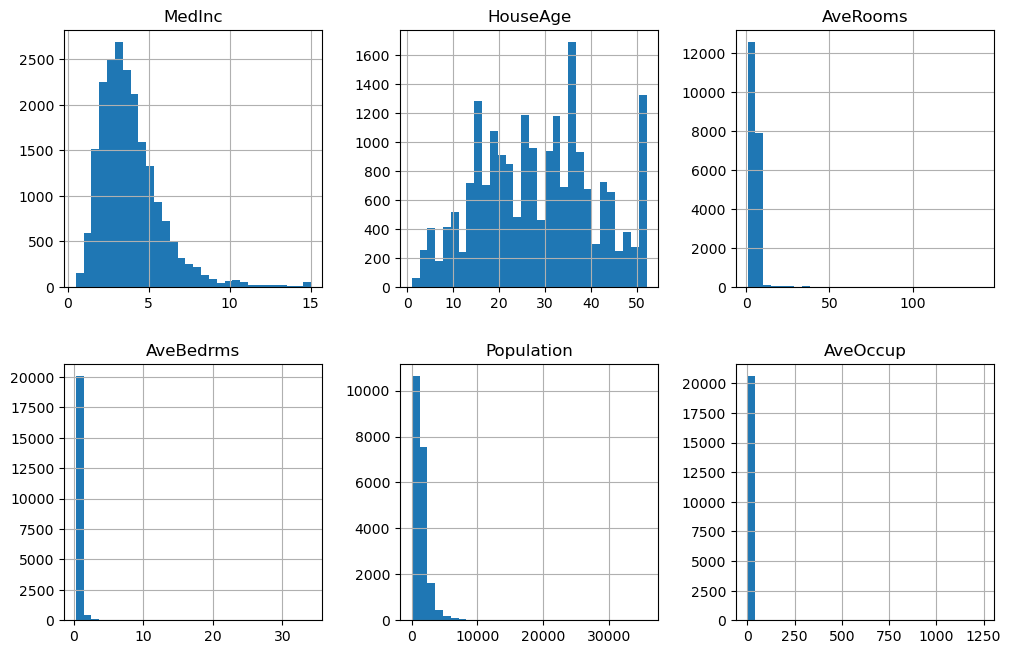

In [390]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Let's drop Latitude and Longitude variables
X.drop(labels=['Latitude','Longitude'], axis=1, inplace=True)

# Let's inspec t the variable distributions with histograms
X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

Let's capture the variable names in a list since we will use these in the following step

In [391]:
variables = list(X.columns)
variables

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [392]:
# Let's create a function that will plot Q-Q plots for all the variables in the data in two rows with three plots each:
def make_qqplot(df: pd.DataFrame):
    plt.figure(figsize=(10, 6), constrained_layout=True)
    for i in range(6):
        ax = plt.subplot(2, 3, i +1)
        var = variables[i]
        stats.probplot((df[var]), dist='norm', plot=plt)
        ax.set_title(var)
    plt.show()


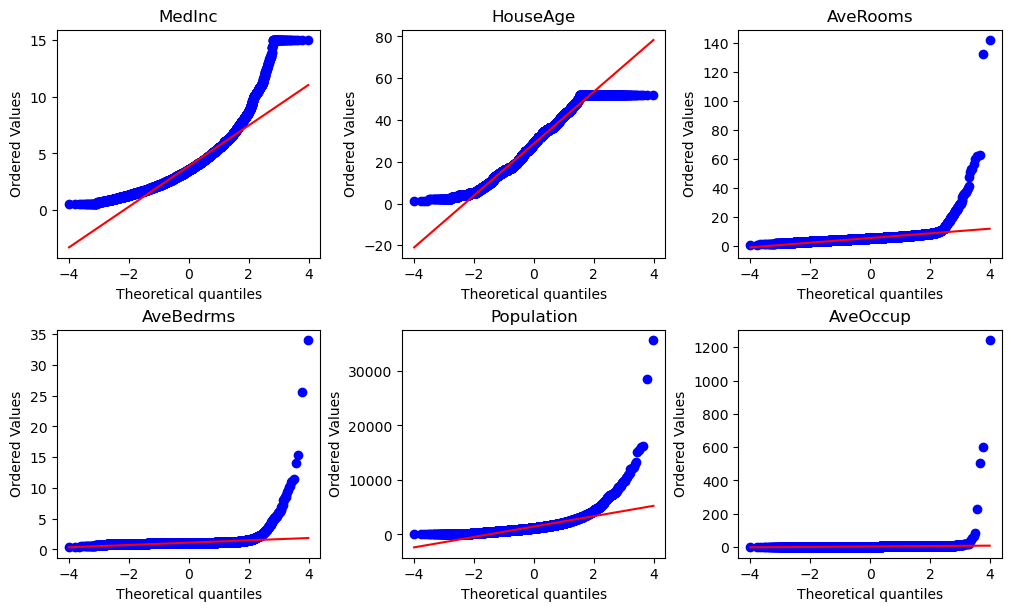

In [393]:
make_qqplot(X)

By looking at the following plots, we can corroborate that the variables are not normally distributed

#### Next, let's carry out the Box-Cox transformation using scikit-learn

In [394]:
transformer = PowerTransformer(method='box-cox', standardize=False).set_output(transform='pandas')
transformer.fit(X)

PowerTransformer(method='box-cox', standardize=False)

**NOTE**: rain and test sets. Thus, remember to split your data into train and test sets before fitting

In [395]:
X_tf = transformer.transform(X)

transformer.lambdas_

array([ 0.09085449,  0.80939809, -0.2980049 , -1.62900026,  0.23576758,
       -0.47630323])

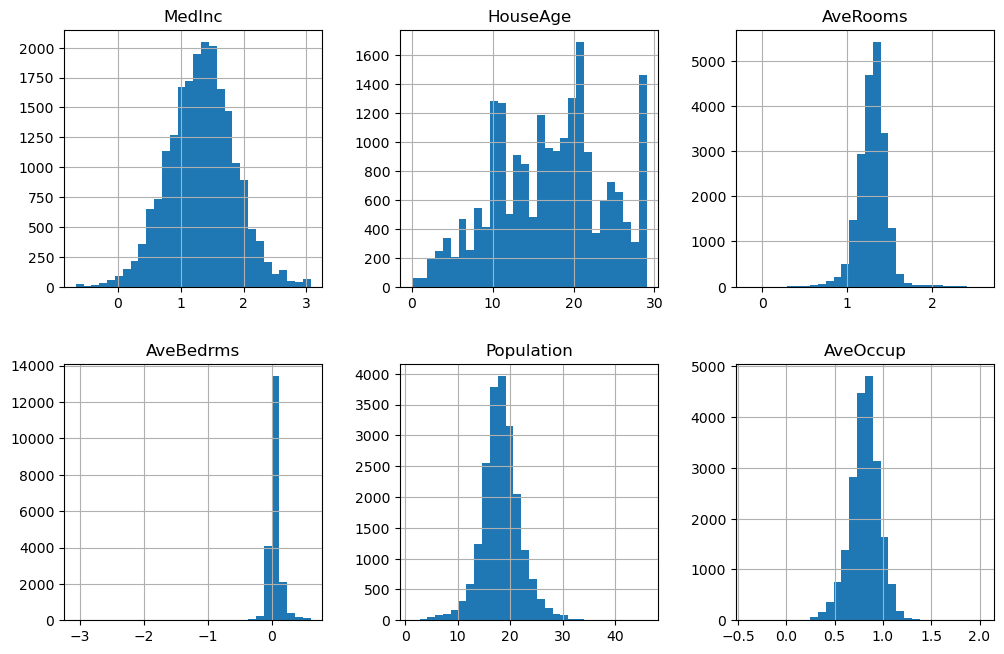

In [396]:
# Let's inspect the distribution of the transformed data with histograms
X_tf.hist(bins=30, figsize=(12, 12), layout=(3,3))
plt.show()

Now, let's return Q-Q plots of the transformed variables:

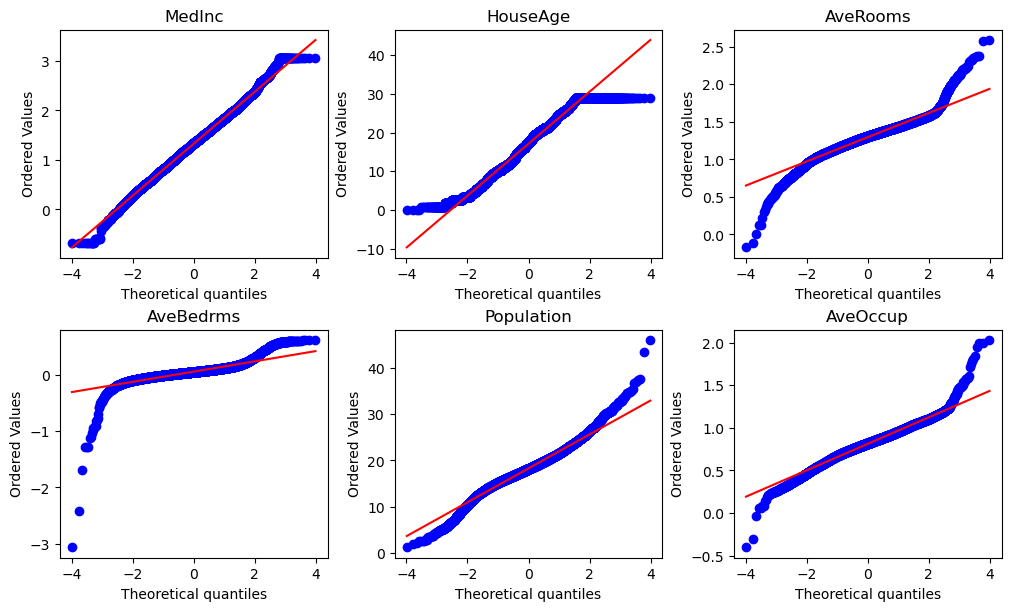

In [397]:
make_qqplot(X_tf)

### Now, let's implement the Box-Cox transformation with Feature-engine

In [398]:
bct = BoxCoxTransformer()
bct.fit(X)

BoxCoxTransformer()

In [399]:
X_tf = bct.transform(X)

**NOTE**: PowerTransformer() from scikit-learn will transform the entire dataset. On the other hand, BoxCoxTransformer() from Feature-engine can modify a subset of the variables, if we pass their names in a list to the variables parameter when setting up the transformer. If the variables parameter is set to None, the transformer will transform all numerical variables seen during fit()

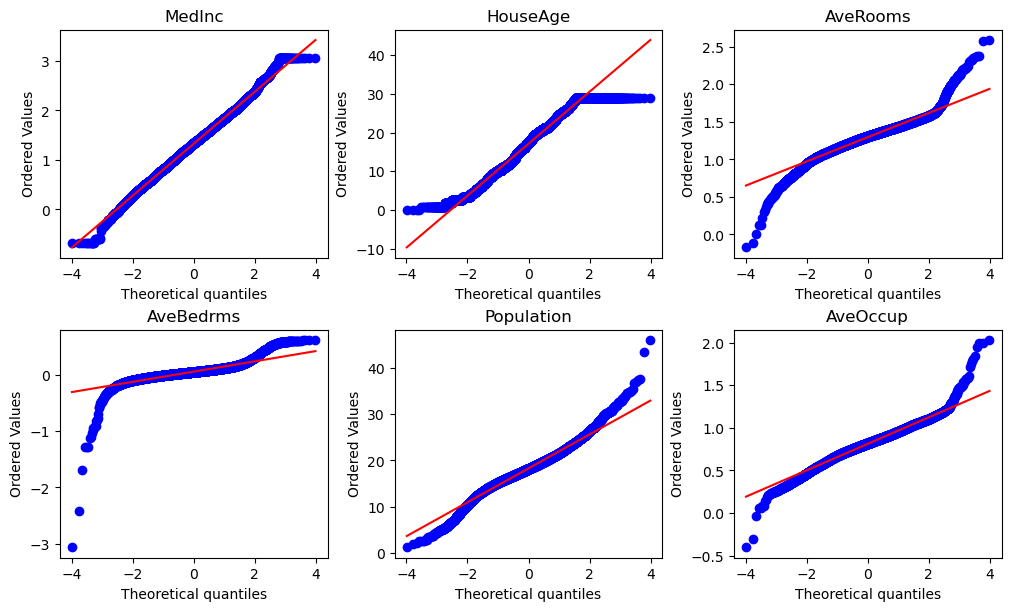

In [400]:
make_qqplot(X_tf)

### Performing Yeo-Johnson transformations

![Yeo-Johnson](../img/yeo-johnson.png)

In [401]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.drop(labels=['Latitude','Longitude'], axis=1, inplace=True)

Now, let's apply the Yeo-Johnson transformation with scikit-learn.

In [402]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False).set_output(transform='pandas')
transformer.fit(X)

PowerTransformer(standardize=False)

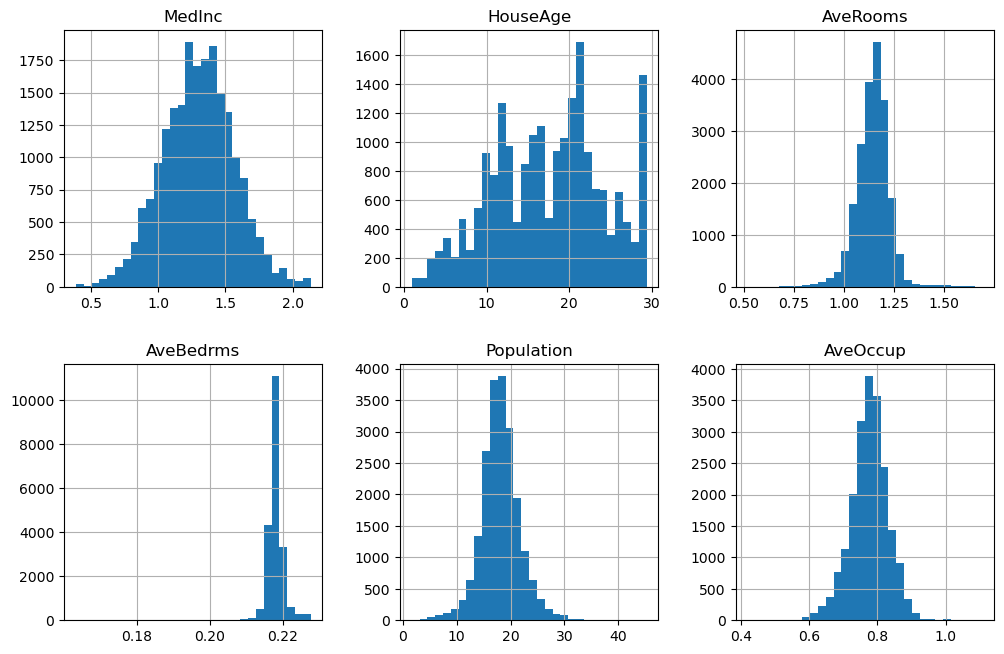

In [403]:
X_tf = transformer.transform(X)

X_tf.hist(bins=30, figsize=(12,12), layout=(3,3))
plt.show()

Finally, let's implement the Yeo-Johnson transformation with Feature-engine

In [404]:
from feature_engine.transformation import YeoJohnsonTransformer

yjt = YeoJohnsonTransformer()
yjt.fit(X)

YeoJohnsonTransformer()

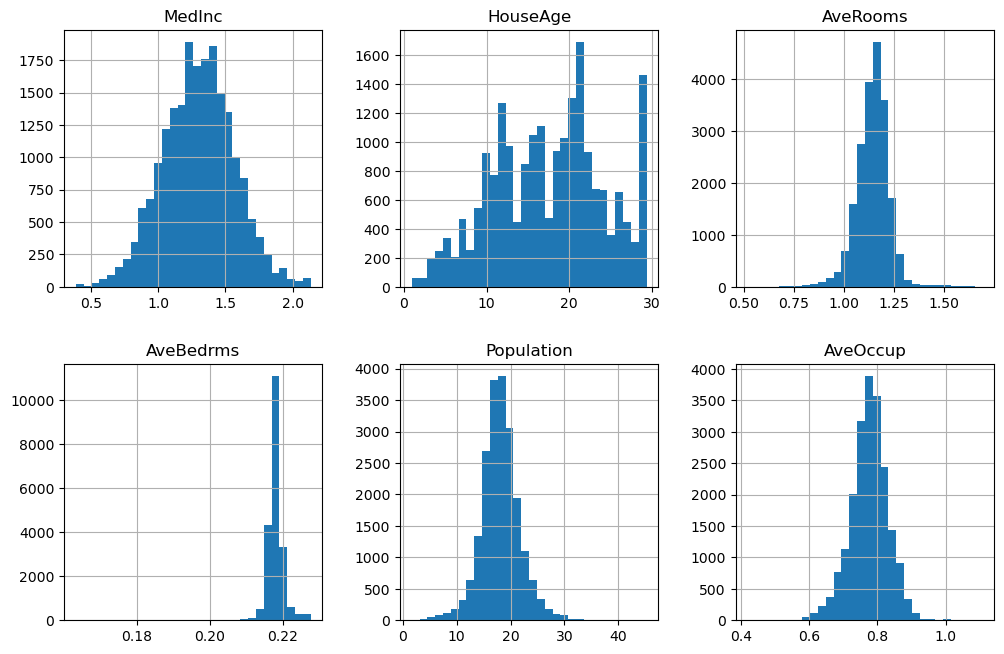

In [406]:
X_tf = yjt.transform(X)
X_tf.hist(bins=30, figsize=(12,12), layout=(3,3))
plt.show()